# Lesson 3: Data Visualization

> Instructor: [Yuki Oyama](mailto:y.oyama@lrcs.ac), [Prprnya](mailto:nya@prpr.zip)
>
> The Christian F. Weichman Department of Chemistry, Lastoria Royal College of Science

This material is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC BY-NC-SA 4.0</a><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

In this lesson, we will learn how to visualize data using **Matplotlib**, which is a powerful Python library for creating static, animated, and interactive visualizations in Python.

Before we start, let's import `numpy` again.

```python
import numpy as np
```

In [1]:
import numpy as np

## Your First Plot Using Matplotlib!

Now, we import the `matplotlib` library. We will use the `pyplot` module from `matplotlib`, i.e., `matplotlib.pyplot`. Like `numpy`, we can choose a brief alias for it:

```python
import matplotlib.pyplot as plt
```

In [2]:
import matplotlib.pyplot as plt

Are you ready? <span style="color:gray">Aye, aye, captain!</span> Let's make our first plot—the [Morse potential](https://en.wikipedia.org/wiki/Morse_potential) between two atoms. If you are not familiar with the Morse potential, you can click the link before, or I will give you a brief introduction.

We all know (_you should know!_) that we usually use the harmonic oscillator to describe a chemical bond. In the harmonic oscillator model, the potential energy is given by:
$$V_\text{harmonic}(r) = \frac{1}{2} k \left( r - r_0 \right)^2$$
where $k$ is the spring constant, $r_0$ is the equilibrium distance, and $r$ is the distance between the two atoms. This model can account for bond vibrations but lacks accuracy in describing bond dissociation. You see that as $r\to\infty$, the potential energy becomes infinite, but that's _unreal_. If two atoms are separated by a large distance, the chemical bond will break down, and the potential energy will become zero. To address this feature, Philip M. Morse proposed a new potential, which later named by himself as the Morse potential:
$$V_\text{Morse}(r) = D_e \left( 1 - e^{-a \left( r - r_0 \right)} \right)^2$$
where $D_e$ is the dissociation energy, $a$ is the spring constant, and $r_0$ is the equilibrium distance.

We are quite familiar with the appearance of the harmonic potential, but what about the Morse potential? Let's see what it looks like. First, we define the Morse potential as a function:

```python
def morse(r, De, a, r0):
    return De * (1 - np.exp(-a * (r - r0)))**2
```

In [3]:
def morse(r, De, a, r0):
    return De * (1 - np.exp(-a * (r - r0)))**2

It's time to use `pyplot`! Run the code below to generate a plot of the Morse potential between two hydrogen atoms in a $\ce{H2}$ molecule:

```python
De = 4.948  # eV
a = 1.905  # 1/Å
r0 = 0.74144  # Å

r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = morse(r, De, a, r0)

plt.plot(r, V_morse)
plt.show()
```

(Data was taken and processed from "Spectroscopic Constants of Diatomic Molecules" in CRC Handbook of Chemistry and Physics, 106th Edition (Internet Version 2025), John R. Rumble, ed., CRC Press/Taylor & Francis, Boca Raton, FL.)

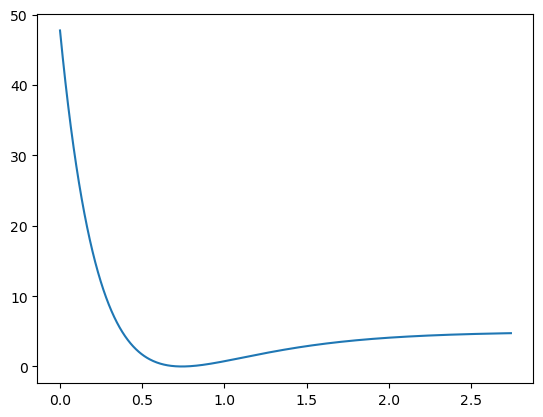

In [4]:
De = 4.948  # eV
a = 1.905  # 1/Å
r0 = 0.74144  # Å

r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = morse(r, De, a, r0)

plt.plot(r, V_morse)
plt.show()

See how nicely the Morse potential shows bond dissociation as $r\to\infty$?

Generally, to make a 2D plot, you just need two arrays: one for the $x$-axis and one for the $y$-axis. Then you call the `plot` function from `plt`, giving it the $x$ data as the first argument and the $y$ data as the second. Finally, use the `show` function to display the plot.

## Linestyles, Markers, and Colors

### Linestyles and Linewidths

In the plot above, `matplotlib` uses the default **linestyle**, which is a solid line. We can change the linestyle by using the `linestyle` keyword argument. For example, we can use dashed lines by:

```python
plt.plot(r, V_morse, linestyle='--')
plt.show()
```

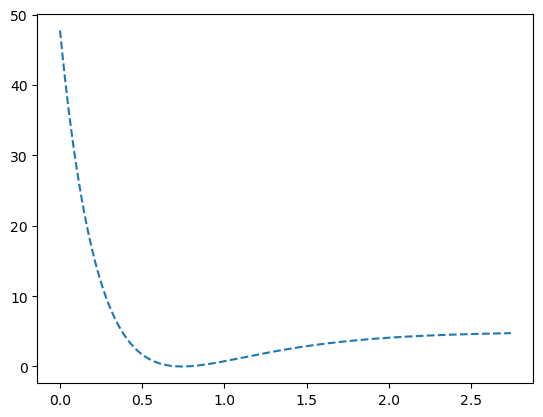

In [5]:
plt.plot(r, V_morse, linestyle='--')
plt.show()

In the code above, we used the `linestyle` keyword argument to specify the line style. Make sure to use quotation marks around the line style name.
Some of the commonly used linestyles are:
| Name    | Shortcut |
|---------|----------|
| `solid`   | `-`      |
| `dotted`  | `:`      |
| `dashed`  | `--`     |
| `dashdot` | `-.`     |

There are many more linestyles available in `matplotlib`. You can find them in the [Matplotlib Documentation - Linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Sometimes we want to change the **linewidth**. For example, we can use a thicker dotted line by:
```python
plt.plot(r, V_morse, linestyle=':', linewidth=3)
plt.show()
```

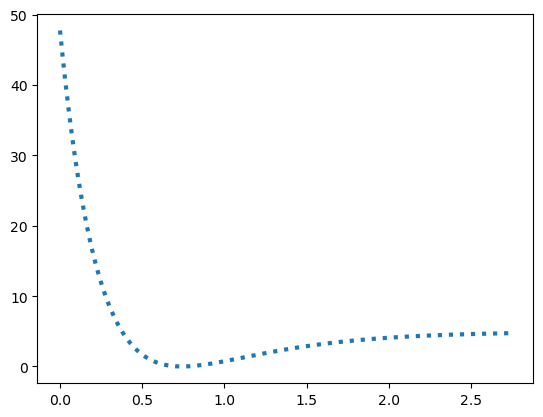

In [6]:
plt.plot(r, V_morse, linestyle=':', linewidth=3)
plt.show()

### Markers

We wouldn't see markers in the plot above because we didn't specify any **markers**. In that case, `matplotlib` interprets to not use any markers, but we can specify markers by using the `marker` keyword argument. For example, we can use filled circles by:

```python
plt.plot(r, V_morse, marker='o')
plt.show()
```

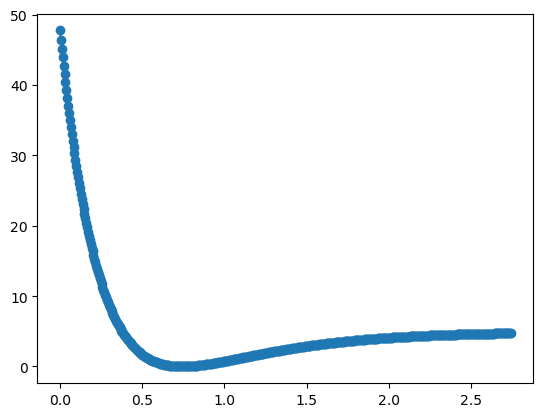

In [7]:
plt.plot(r, V_morse, marker='o')
plt.show()

Ohhhh wait... That looks terrible! Those circles are too dense. That's because we used the pretty dense step size of 500 points. For now, let's use a larger step size to get 50 points:

```python
plt.plot(r[::10], V_morse[::10], marker='o')
plt.show()
```

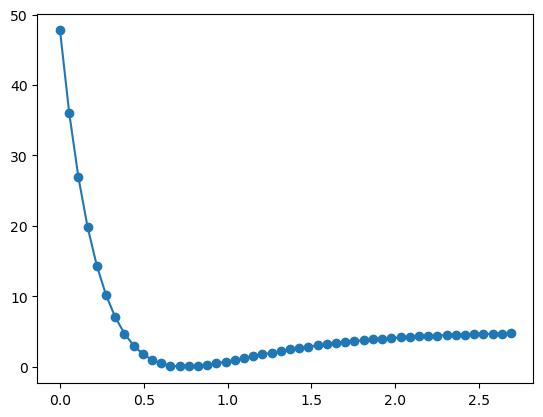

In [8]:
plt.plot(r[::10], V_morse[::10], marker='o')
plt.show()

Actually we have another way to solve this problem, which is to adjust the size of the markers by using the `markersize` (or abbreviated `ms`) keyword argument. For example, we can use a smaller size by:

```python
plt.plot(r, V_morse, marker='o', markersize=2.5)
plt.show()
```

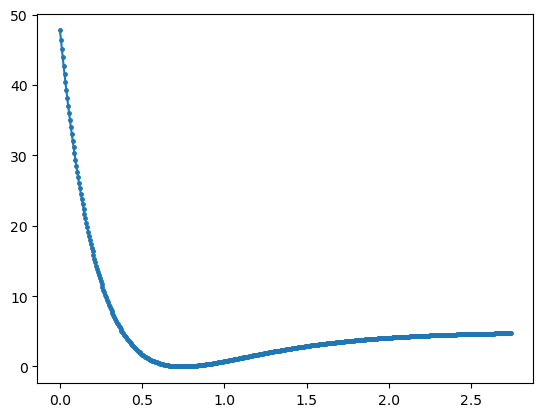

In [9]:
plt.plot(r, V_morse, marker='o', markersize=2.5)
plt.show()

Well... That's still not very pretty, but remember, in a real case, the step size is usually controlled by the resolution of your collecting instrument, rather than a `linspace` function, and you don't need to plot markers for every single point if your data is large and points are close. Just show lines!

You can change to other markers if you want. For example, we can use triangles:

```python
plt.plot(r[::10], V_morse[::10], marker='^')
plt.show()
```

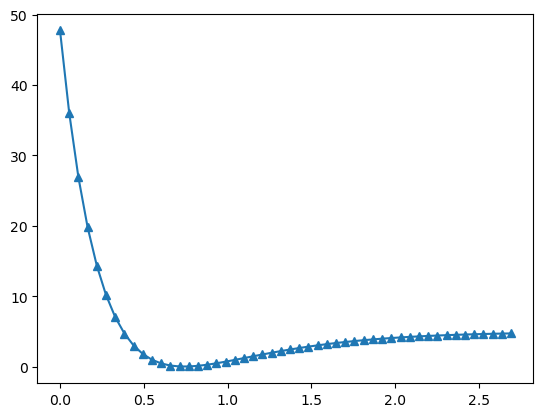

In [10]:
plt.plot(r[::10], V_morse[::10], marker='^')
plt.show()

Sometimes we don't want to use lines but only markers. In that case, we can use the `linestyle` keyword argument with an empty string:

```python
plt.plot(r[::10], V_morse[::10], linestyle='', marker='^')
plt.show()
```

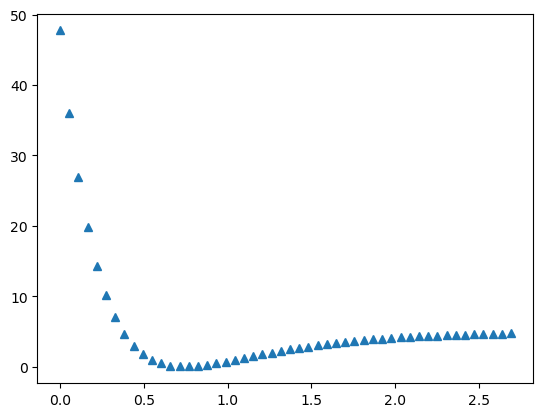

In [11]:
plt.plot(r[::10], V_morse[::10], linestyle='', marker='^')
plt.show()

Vice versa if we want to use lines but no markers, i.e., `marker=''`.

Even more, you can use math symbols in the `marker` keyword argument. Try this:

```python
plt.plot(r[::10], V_morse[::10], linestyle='', marker=r'$\beta$')
plt.show()
```

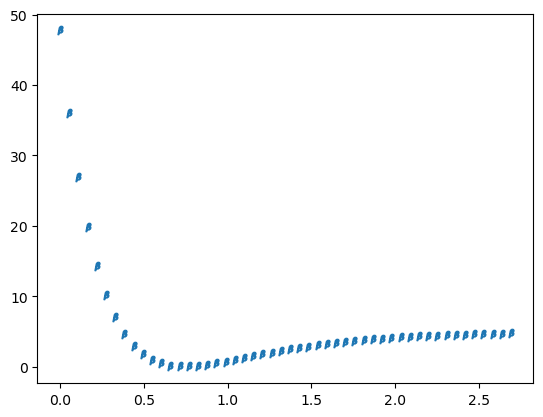

In [12]:
plt.plot(r[::10], V_morse[::10], linestyle='', marker=r'$\beta$')
plt.show()

Be sure to include `r` before the dollars wrapped in double quotations! Otherwise, it will not render as you want.

For more markers, you can check the [Matplotlib Documentation - Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html).

### Colors

In the plot above, we used the default **color**, which is blue. We can change the color by using the `color` (abbreviated as `c`) keyword argument. For example, we can use red by:

```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='red')
plt.show()
```

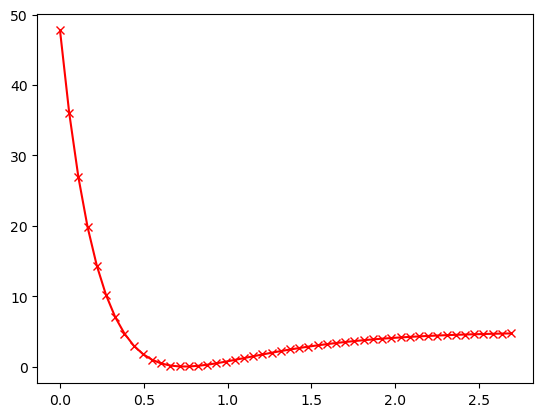

In [13]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='red')
plt.show()

In the code above, we used the `color` keyword argument to specify the color. Make sure to use quotation marks around the color name. As usual, there are many more colors available in `matplotlib`. It's not difficult to guess that `green` and `yellow` give green and yellow plots. You can even use an RGB color code or a hexadecimal color code. For example, we can use green by giving the RGB color code `(0, 0.5, 0)`:

```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color=(0, 0.5, 0))
plt.show()
```

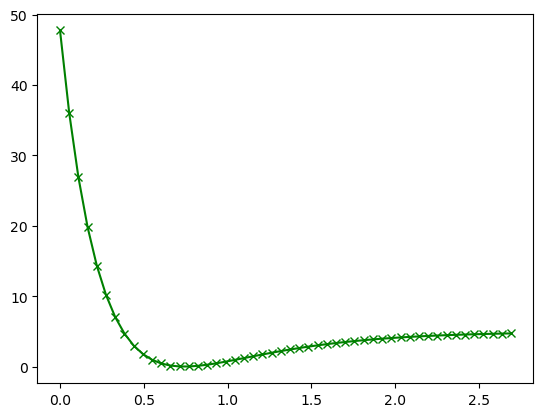

In [14]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color=(0, 0.5, 0))
plt.show()

Notice that the RGB code is wrapped within parentheses in a sequence (R, G, B), <u>ranging from 0 to 1</u>.

Let's try one more for the thematic color of Yu~ The color `#98caec`:
```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='#98caec')
plt.show()
```

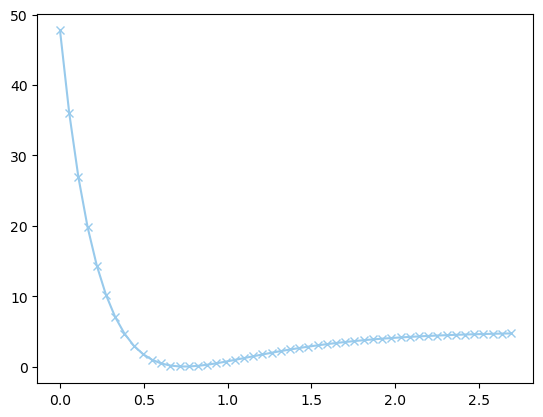

In [15]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='x', color='#98caec')
plt.show()

This is a hexadecimal color code. You need to start with `#` and then use six hexadecimal digits. Also, remember to wrap the color code within quotation marks.

What if we want to set different colors for the lines and the markers? And what if we'd like the marker's edge and fill to have different colors? For this, we can use the `markerfacecolor` (abbreviated `mfc`) and `markeredgecolor` (abbreviated `mec`) keyword arguments. For example, we could draw a blue line with gold markers outlined in black using:

```python
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='o', color='blue', mfc='gold', mec='black')
plt.show()
```

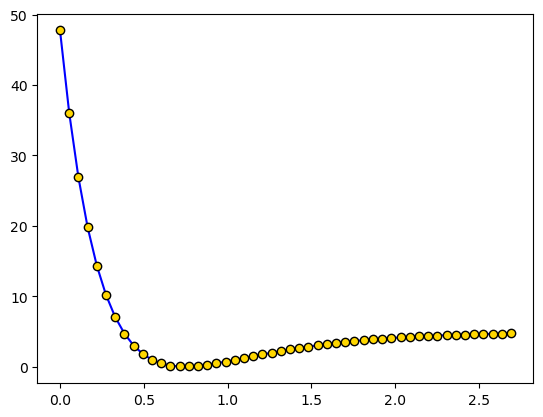

In [16]:
plt.plot(r[::10], V_morse[::10], linestyle='-', marker='o', color='blue', mfc='gold', mec='black')
plt.show()

For more about colors and their usage, you can find them in the [Matplotlib Documentation - Color reference](https://matplotlib.org/stable/gallery/color/named_colors.html) and [Matplotlib Documentation - Specifying colors](https://matplotlib.org/stable/users/explain/colors/colors.html).

<u>Not sure how to pick colors? Try [Adobe Color](https://color.adobe.com/create/color-wheel)—a free online tool that makes it easy to explore palettes and discover great combinations.</u>

<span style="color:green">**Exercise**:</span> Suppose we want to plot another common potential, the [Lennard-Jones potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential), also termed L-J potential or 12-6 potential, which is a simple potential that describes intermolecular interactions. The potential is given by:
$$V_\text{LJ} = 4\varepsilon \left[\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right]$$
where $\varepsilon$ is the well's depth, $\sigma$ is the distance at which the potential is zero, and $r$ is the distance between the two molecules.

Define a function `LJ(r, sigma, epsilon)` that takes in the distance $r$, $\sigma$, and $\varepsilon$ as parameters and returns the value of the L-J potential. Plot this potential for molecular $\ce{H2}$ in the range $r \in [2.5, 10]\,\mathrm{Å}$. Use $\sigma = 2.81\,\mathrm{Å}$ and $\varepsilon = 3.40 \times 10^{-3}\,\mathrm{eV}$ (data was taken from [_J. Mol. Struct._ **2014**, 068, 164–169](https://doi.org/10.1016/j.molstruc.2014.04.006)). You should display the plot with a yellow dashed line and 30 circle markers with red edge, filled with your favorite color.

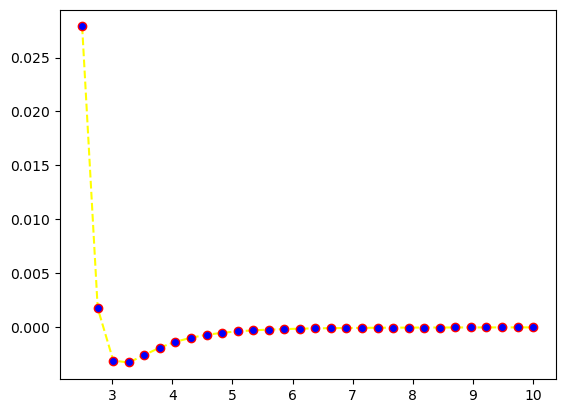

In [17]:
def LJ(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

r = np.linspace(2.5, 10, 30)
sigma = 2.81
epsilon = 3.40 * 10**(-3)

V_LJ = LJ(r, sigma, epsilon)

plt.plot(r, V_LJ, linestyle='--', color='yellow', marker='o', mfc='blue', mec='red')

plt.show()

## The Axes Module and Subplots

So far, we have learned how to make simple plots with lines and markers, and how to adjust their appearance, but what if we want to step things up and create more informative plots—with titles, axis labels, legends, custom ticks, or even multiple axes? This can be achieved through the `axes` module as subplots. However, we will not use `axes` module directly, but we will call functions from `plt` to meet our goals.

<img src="./anatomy.png" alt="Anatomy of a Figure" width="50%" align="center"/>

> Image source: [Matplotlib documentation](https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure)

### Titles and Legends

Before diving in, though, let's take a break from the Morse potential. Don't worry—we'll come back to it later. For now, let's switch things up and plot a classic function: $\sin x$, since this function can better illustrate our concepts.

```python
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()
```

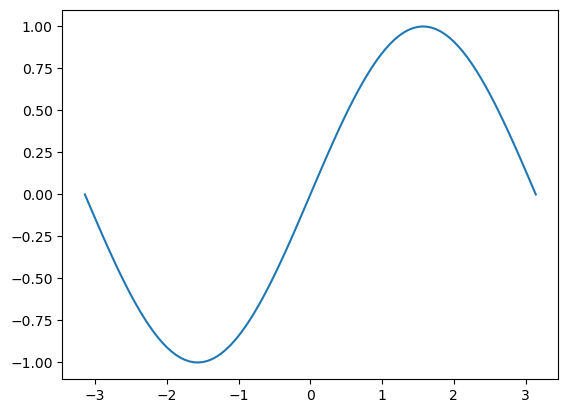

In [18]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.show()

We can use the `title` and `legend` functions to add **titles** and **legends** to our plots. For example, we can add a title to the plot by calling `plt.title()` and passing in the title as a string:

```python
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()
```

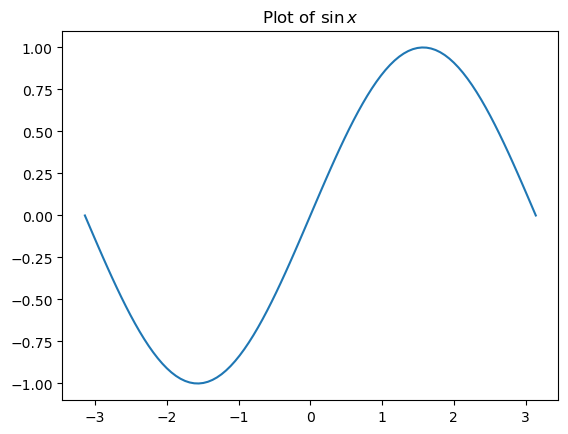

In [19]:
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()

Note that the $\sin x$ in the title is displayed as a LaTeX string, but in _sans-serif_ font. To use a _serif_ font, you can enable LaTeX rendering in `matplotlib` by setting:

```python
plt.rcParams['text.usetex'] = True
```

(Rendering in LaTeX needs a full [LaTeX installation](https://www.latex-project.org/get/); if you don't know how to install it, just skip this block; otherwise you will see an error due to lack of LaTeX environment.) Try the following code:

```python
plt.rcParams['text.usetex'] = True
plt.plot(x, y)
plt.title('Plot of $\sin x$')
plt.show()
```

You should be aware that the full LaTeX rendering is slow. There are some ways to turn around, but for now let's move on. (we'll get back later!)

Also, don't forget to set the `plt.rcParams` back to its default value (`False`) after you're done with the above plot.

```python
plt.rcParams['text.usetex'] = False
```

In [20]:
plt.rcParams['text.usetex'] = False

We can also add a legend to the plot by calling `plt.legend()`. For using this, we need to label the lines by calling `plt.plot()` with the `label` keyword argument. That is, `label='$\sin x$'` as a parameter in the `plot` function. Then you can call `plt.legend()` and pass in the labels as a <u>list</u> of strings:

```python
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'])
plt.show()
```

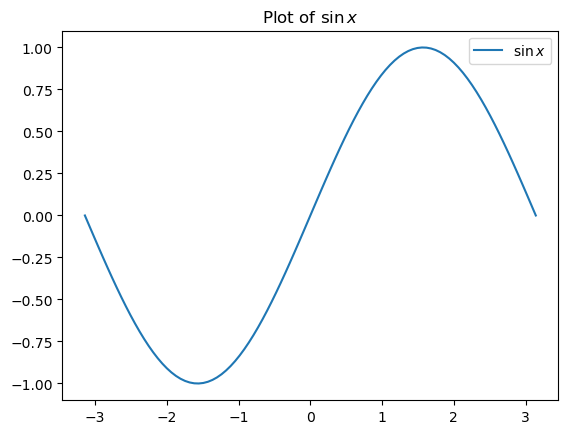

In [21]:
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'])
plt.show()

You can see that the legend appears in a small box in the upper-right corner of the plot, showing the label you specified in the `plot` function. The position of this legend can be customized with the `loc` keyword argument. For example, to place the legend in the upper-left corner, you can write:

```python
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'], loc='upper left')
plt.show()
```

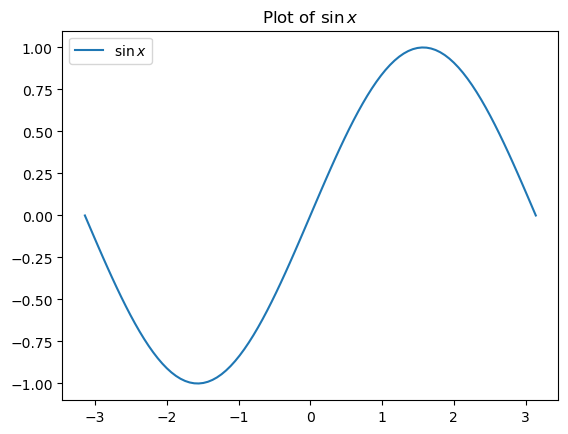

In [22]:
plt.plot(x, y, label='$\sin x$')
plt.title('Plot of $\sin x$')
plt.legend(['$\sin x$'], loc='upper left')
plt.show()

The `loc` argument accepts either descriptive string like `upper left`, `'lower right'`, `'center'`, etc. This gives you flexibility to place the legend exactly where it best fits your figure. To see all the available options, you can check the [Matplotlib Documentation - Legends](https://matplotlib.org/stable/users/explain/axes/legend_guide.html).

### Axes, Ticks, and Scales

Customizing **axes** is straightforward. You can use `plt.xlabel()` and `plt.ylabel()` to label the $x$- and $y$-axes, respectively. For example, making a plot of $\sin x$ with properly labeled axes needs:

```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.show()
```

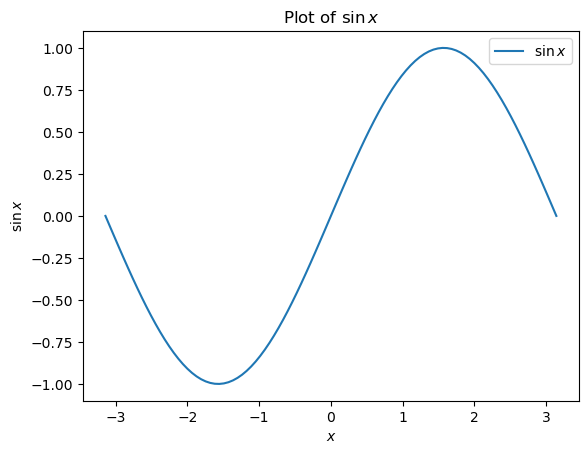

In [23]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.show()

Sometimes the default axis **tick** marks are not the most convenient for interpreting your data. For trigonometric functions, for example, it's often clearer to label the $x$-axis in terms of radians ($-\pi. -\frac{\pi}{2}, 0, \frac{\pi}{2}, \pi$) instead of decimal numbers. We can easily do this with `plt.xticks()` after plotting:

```python
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis from -pi to pi with multiples of pi/2 and 0
plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$', r'$-\frac{\pi}{2}$', '$0$', r'$\frac{\pi}{2}$', r'$\pi$']
)

plt.show()
```

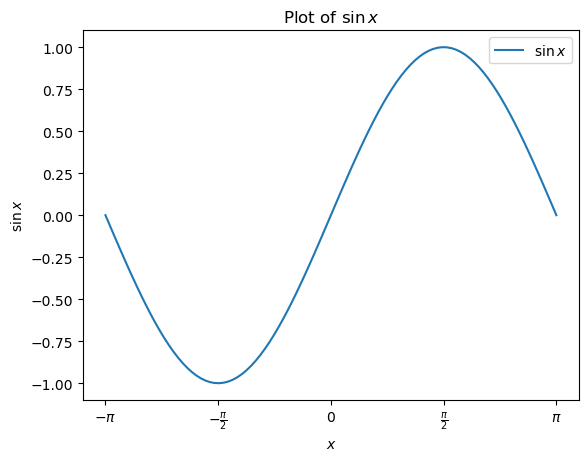

In [24]:
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis from -pi to pi with multiples of pi/2 and 0
plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$', r'$-\frac{\pi}{2}$', '$0$', r'$\frac{\pi}{2}$', r'$\pi$']
)

plt.show()

Here, `plt.xticks()` takes two arguments: a list of tick positions (numerical values) and a list of corresponding labels (strings or LaTeX). This lets us replace the default decimal ticks with more meaningful values—like multiples of $\pi$, which are the most natural scale for $\sin x$. In the example below, we set the $x$-axis to range from $-\pi$ to $\pi$ with ticks every $\pi/2$:

```python
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis ticks from -pi to pi with steps of pi/2 using np.arange()
# Note that we add 0.1 to the end of the range since we want to include the last tick
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

plt.show()
```

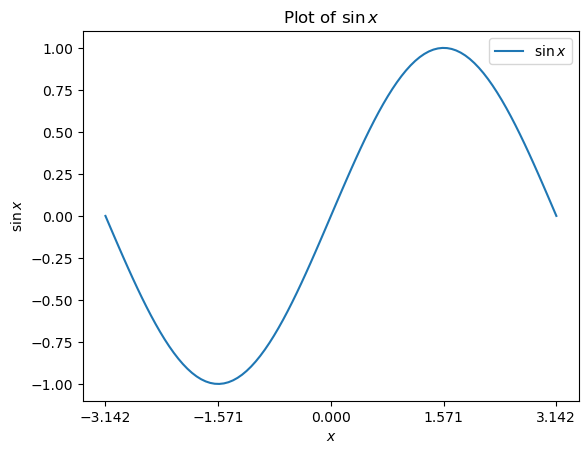

In [25]:
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis ticks from -pi to pi with steps of pi/2 using np.arange()
# Note that we add 0.1 to the end of the range since we want to include the last tick
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

plt.show()

However, this approach will only display numerical values, not the nice fractional multiples of $\pi$ that we usually prefer in math. In the same way, you can use plt.yticks() to customize the labels on the $y$-axis. I'll leave that to you as a practice.

Other than the **major ticks**, which are the ticks that carry labels, there are also **minor ticks**, which are ticks that mark intermediate positions but usually do not have labels. By default, Matplotlib hides minor ticks, but we can turn them on when we want extra guidance on the axis scale. The easiest way to show minor ticks is to enable them with the `minor=True` option in `plt.xticks()` `or plt.yticks()`. For example, to add minor ticks along the $x$-axis, you can write:

```python
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Add major ticks at multiples of pi/2
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

# Add minor ticks at multiples of pi/8
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.show()
```

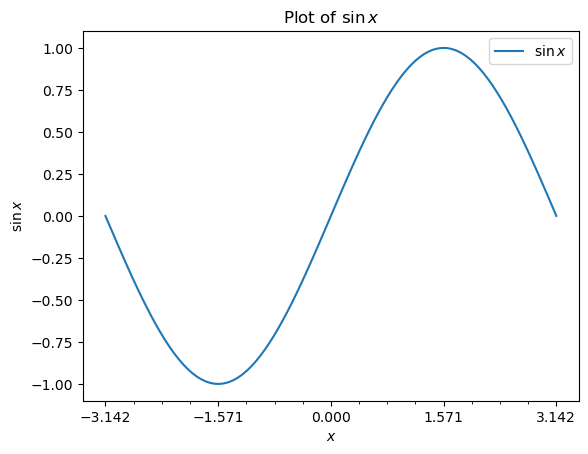

In [26]:
plt.plot(x, y, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Add major ticks at multiples of pi/2
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))

# Add minor ticks at multiples of pi/8
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.show()

If you have noticed, matplotlib automatically decides the axis **ranges** based on our data. That usually works fine, but sometimes we want to zoom in or out to highlight certain features. In those cases, we can manually set the visible range of the $x$- and $y$-axes. For example, we may want to plot a function of $x$ in the range $[0, 100]$ and $y$ in the range $[-1, 1]$. We can do this with `plt.axis()`. For example, we can plot the function $\sin x$ in the range $[0, 100]$ and $y$ in the range $[-1, 1]$ by:

```python
x2 = np.linspace(0, 100, 1000)
y2 = np.sin(x2)

plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis from 0 to 100 and y-axis from -1 to 1; plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0, 100, -1, 1])

plt.show()
```

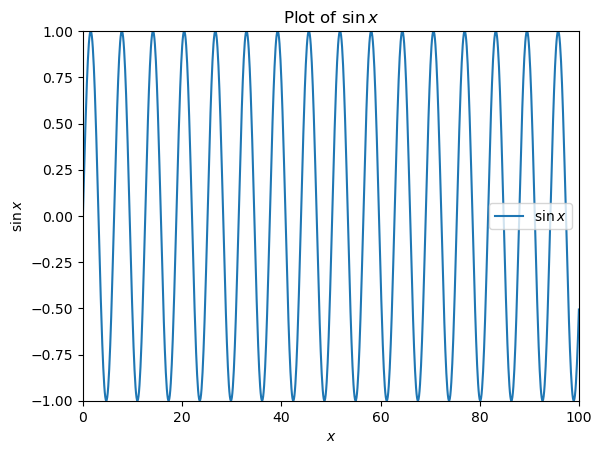

In [27]:
x2 = np.linspace(0, 100, 1000)
y2 = np.sin(x2)

plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis from 0 to 100 and y-axis from -1 to 1; plt.axis([xmin, xmax, ymin, ymax])
plt.axis([0, 100, -1, 1])

plt.show()

If we want to only adjust the $x$-axis or $y$-axis, we can use `plt.xlim()` and `plt.ylim()`. The range of another axis will be determined automatically. For example, we can plot the function $\sin x$ in the range $[0, \pi]$ by:

```python
plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis from 0 to pi
plt.xlim([0, np.pi])

plt.show()
```

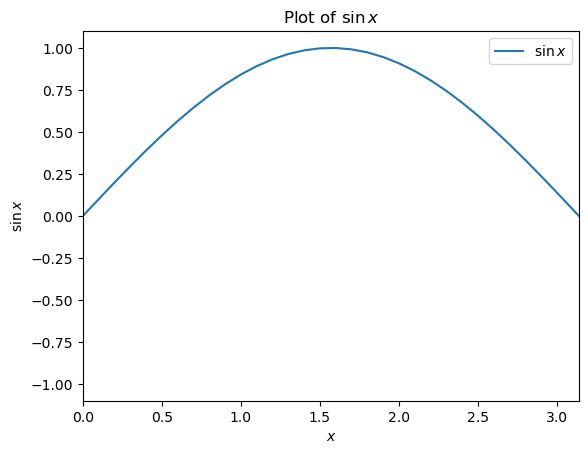

In [28]:
plt.plot(x2, y2, label='$\sin x$')
plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

# Set x-axis from 0 to pi
plt.xlim([0, np.pi])

plt.show()

So far, we've been plotting with the default _linear_ **scale** on both axes. But what if our data spans several orders of magnitude, or follows an exponential or power law trend? In those cases, a linear axis can make important features nearly invisible. Matplotlib allows us to change axis scales very easily using `plt.xscale()` and `plt.yscale()`. For example, let's plot an exponential function and see how it looks under different scales:

```python
x3 = np.linspace(0.1, 10, 400)
y3 = np.exp(x3)

plt.plot(x3, y3, label='$e^x$')
plt.xlabel('$x$')
plt.ylabel('$e^x$')

plt.title('Plot of $e^x$ for $y$-Axis in Logarithmic Scale')
plt.legend()

# Switch the y-axis to logarithmic scale
plt.yscale('log')

plt.show()
```

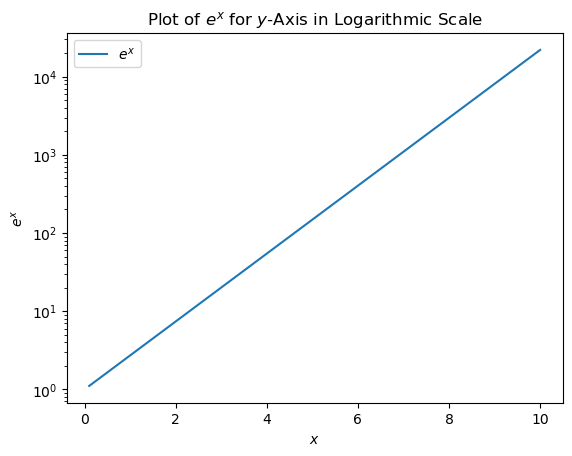

In [29]:
x3 = np.linspace(0.1, 10, 400)
y3 = np.exp(x3)

plt.plot(x3, y3, label='$e^x$')
plt.xlabel('$x$')
plt.ylabel('$e^x$')

plt.title('Plot of $e^x$ for $y$-Axis in Logarithmic Scale')
plt.legend()

# Switch the y-axis to logarithmic scale
plt.yscale('log')

plt.show()

We see that the exponential function appears as a straight line when plotted on a _logarithmic_ scale. This kind of treatment is very useful when we want to recover linearity from exponential data. Consider another example: the first-order hydrolysis of tert-butyl bromide:

$$\ce{(CH3)3CBr + NaOH -> (CH3)3COH + NaBr}$$

The rate law for this reaction is

$$\text{rate} = -\frac{d[\ce{(CH3)3CBr}]}{dt} = k[\ce{(CH3)3CBr}]$$

Solving this differential equation gives the integrated rate law:

$$[\ce{(CH3)3CBr}] = [\ce{(CH3)3CBr}]_0 \cdot e^{-kt}$$

This expression is exponential in $t$. To analyze such data more easily, we usually take the natural logarithm of both sides to obtain a linear form ($y = mx + b$):

$$\underbrace{\ln [\ce{(CH3)3CBr}]}_{y} = \underbrace{-k}_m \underbrace{t}_x + \underbrace{\ln[\ce{(CH3)3CBr}]_0}_b $$

Alternatively, instead of transforming the equation, we can plot the original exponential form while setting the $y$-axis to a logarithmic scale. This way, the exponential decay appears as a straight line without explicitly taking logarithms.

```python
k = 0.1  # rate constant, set to 0.1 for simplicity
c0 = 1.0 # initial concentration, set to 1.0 for simplicity

t = np.linspace(0, 100, 200)
c = c0 * np.exp(-k * t)

plt.plot(t, c, label='$[\mathrm{(CH_3)_3CBr}]$')
plt.xlabel('$t$ (s)')
plt.ylabel('$[\mathrm{(CH_3)_3CBr}]$ (M)')
plt.title('First-Order Hydrolysis of tert-Butyl Bromide')
plt.yscale('log')  # log scale for y-axis
plt.legend()
plt.show()
```

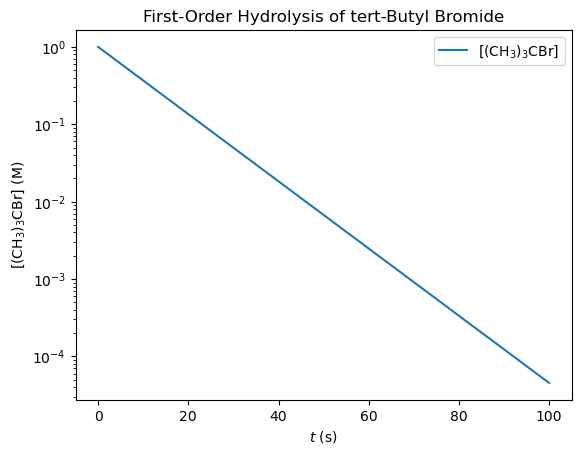

In [30]:
k = 0.1  # rate constant, set to 0.1 for simplicity
c0 = 1.0 # initial concentration, set to 1.0 for simplicity

t = np.linspace(0, 100, 200)
c = c0 * np.exp(-k * t)

plt.plot(t, c, label='$[\mathrm{(CH_3)_3CBr}]$')
plt.xlabel('$t$ (s)')
plt.ylabel('$[\mathrm{(CH_3)_3CBr}]$ (M)')
plt.title('First-Order Hydrolysis of tert-Butyl Bromide')
plt.yscale('log')  # log scale for y-axis
plt.legend()
plt.show()

We will see more applications of this kind of analysis in the fitting and optimization lesson.

### Grids and Axes Spines

Next, let's make our plot easier to read by adding a **grid**. A grid overlays horizontal and vertical reference lines on the figure, which helps the eye track values more precisely. In Matplotlib, this is done with the `plt.grid()` function. For example, we can add a grid to the plot of $\sin x$ with:

```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid()

plt.show()
```

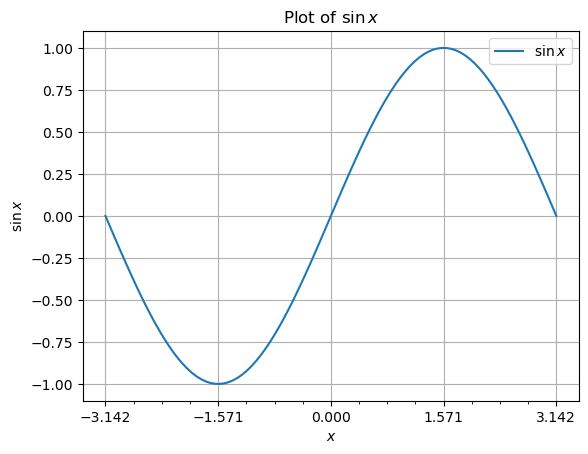

In [31]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid()

plt.show()

What do you think the default grid color and style are? For me, these solid line grids are kind of distracting. What if we want to change them, for instance, to dashed lines? You can actually do it pretty easily by using `plt.grid(linestyle='--')`.

```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

plt.show()
```

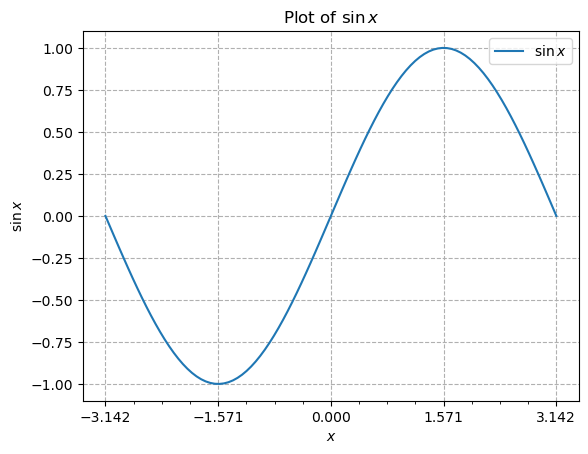

In [32]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

plt.show()

All functionalities that we have learned so far are available in the `plt.grid` module, like changing the color, style, and linewidth.

```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle=':', color='#98caec', linewidth=1)

plt.show()
```

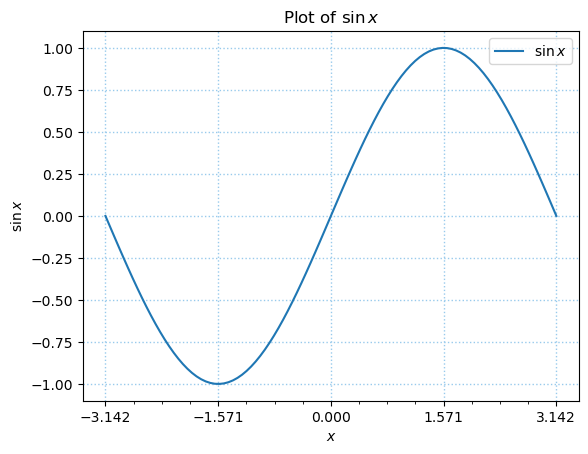

In [33]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle=':', color='#98caec', linewidth=1)

plt.show()

The **spines** are the lines that mark the boundaries of the plotting area (top, bottom, left, and right). By default, all four spines are visible, but we can adjust their visibility, position, and style to improve the clarity of a plot. Adjusting spines is a little different: you need to access them through `plt.gca().spines` rather than `plt.spines`. For example, we can hide the top and right spines of the plot with:

```python
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

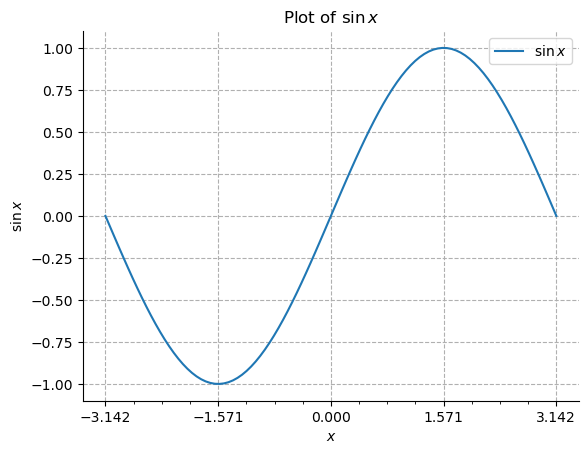

In [34]:
plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In the example above, we hide the top and right spines of the plot by using the `set_visible()` method. Other spine properties include `set_color()`, `set_linewidth()`, and `set_linestyle()`. For example, we can change the color of the top spine to red by:

```python
plt.plot(x, y, label='$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

# Adjust spine properties
plt.gca().spines['left'].set_position(('data', 0))   # move y-axis to x=0
plt.gca().spines['bottom'].set_position(('data', 0)) # move x-axis to y=0
plt.gca().spines['left'].set_color('blue')           # change color
plt.gca().spines['bottom'].set_linewidth(2)          # make thicker
plt.gca().spines['top'].set_visible(False)           # hide top spine
plt.gca().spines['right'].set_visible(False)         # hide right spine

plt.show()
```

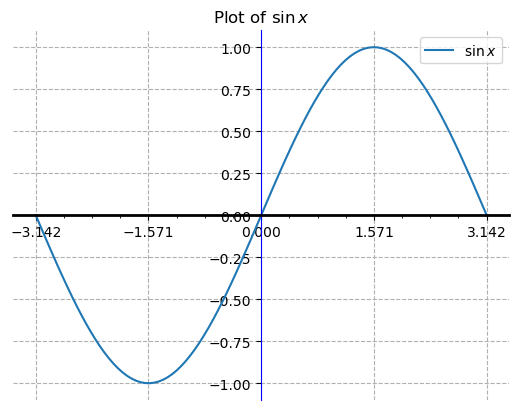

In [35]:
plt.plot(x, y, label='$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')

# Adjust spine properties
plt.gca().spines['left'].set_position(('data', 0))   # move y-axis to x=0
plt.gca().spines['bottom'].set_position(('data', 0)) # move x-axis to y=0
plt.gca().spines['left'].set_color('blue')           # change color
plt.gca().spines['bottom'].set_linewidth(2)          # make thicker
plt.gca().spines['top'].set_visible(False)           # hide top spine
plt.gca().spines['right'].set_visible(False)         # hide right spine

plt.show()

A summary of the most important methods for controlling spines is given below:

| Property    | Method / Argument         | Description                                                   |
|-------------|---------------------------|---------------------------------------------------------------|
| Visibility  | `spine.set_visible()`     | Show (`True`) or hide (`False`) a spine.                      |
| Position    | `spine.set_position()`    | Control where the spine is placed (`'data'`, `'axes'`, `'outward'`). |
| Color       | `spine.set_color()`       | Set the spine color (e.g., named color or hex code).          |
| Linewidth   | `spine.set_linewidth()`   | Adjust the thickness of the spine in points.                  |
| Linestyle   | `spine.set_linestyle()`   | Change the style of the spine (`'-'`, `'--'`, `':'`, `'-. '` etc.). |

### Other Figure Settings

Here are a few additional figure options you may find useful. To change the overall figure size, use `plt.figure(figsize=(width, height))`. For example, the code below creates a figure that is 10 inches wide and 5 inches tall:

```python
# set figure size to 10x5 inches
plt.figure(figsize=(10, 5))

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

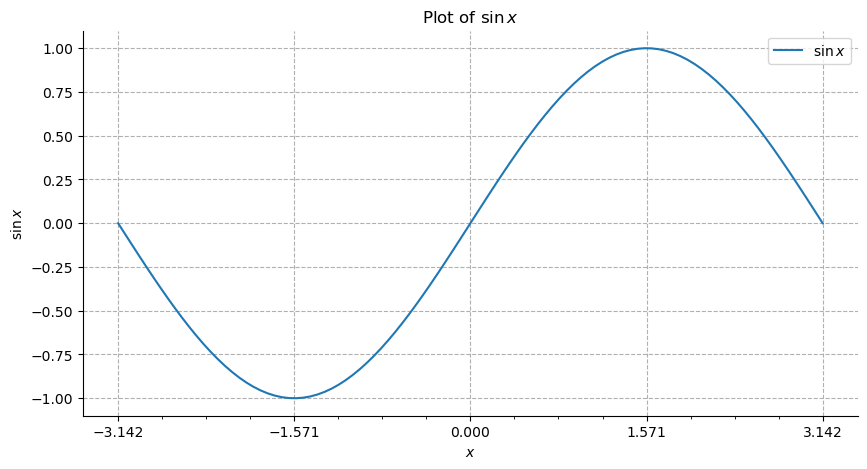

In [36]:
# set figure size to 10x5 inches
plt.figure(figsize=(10, 5))

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

We can control the resolution of the figure by using another argument in `plt.figure()`: `dpi`. For example, the code below creates a figure with a resolution of 300 dots per inch:

```python
# set figure resolution to 300 dots per inch
plt.figure(figsize=(10, 5), dpi=300)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

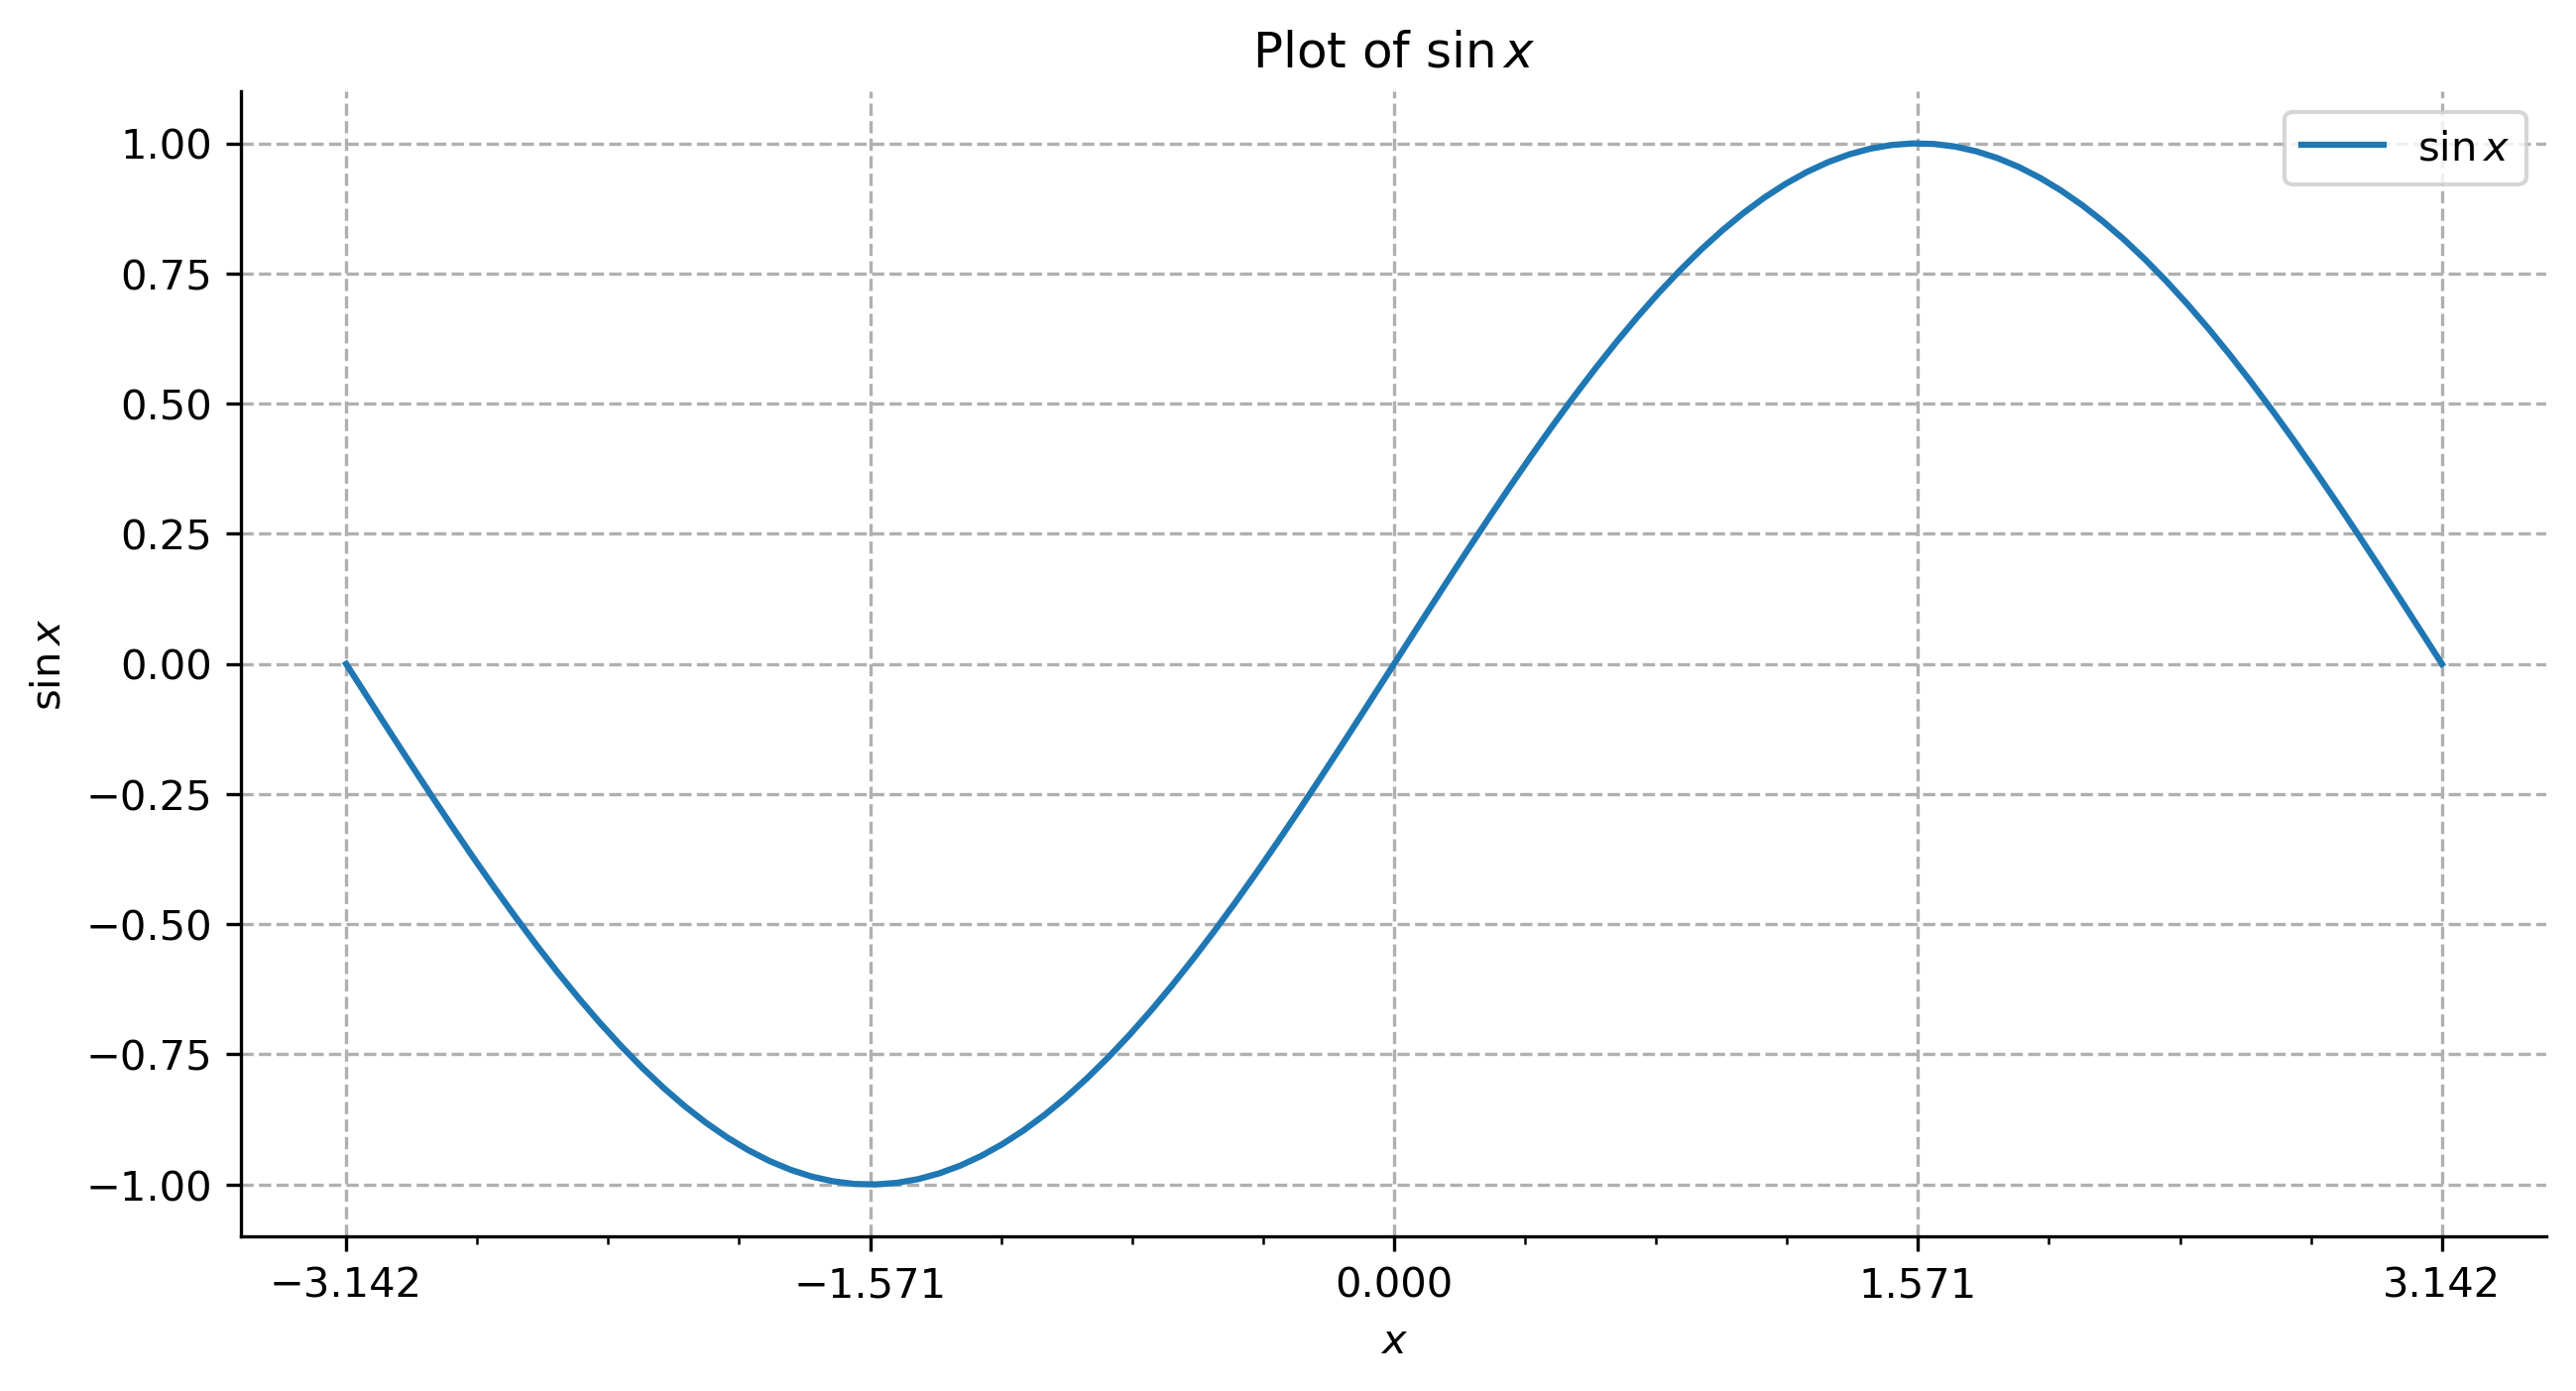

In [37]:
# set figure resolution to 300 dots per inch
plt.figure(figsize=(10, 5), dpi=300)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

The default figure resolution is 100 dots per inch (`dpi=100`).

We can also adjust the figure background color and border with `facecolor` and `edgecolor` in `plt.figure()`. For example, the code below creates a Yu-blue background with a Miku-teal border:

```python
# set figure background color to Yu-blue and border color to Miku-teal
plt.figure(figsize=(10, 5), facecolor='#98caec', edgecolor='#39c5bb', linewidth=12)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
```

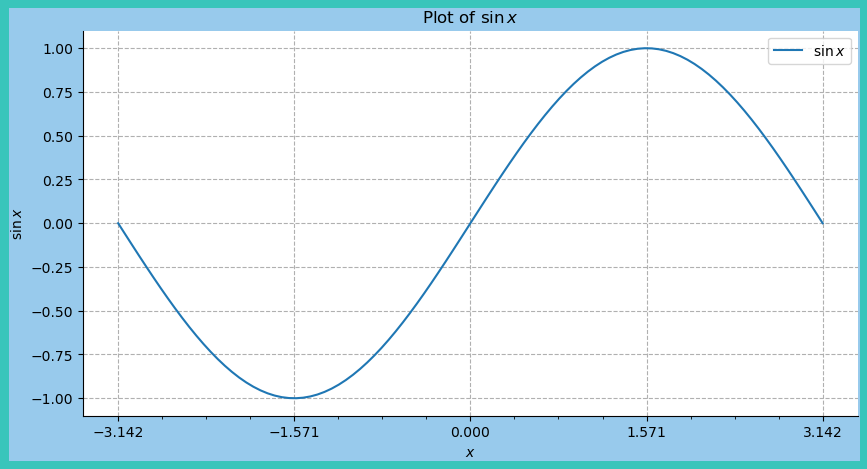

In [38]:
# set figure background color to Yu-blue and border color to Miku-teal
plt.figure(figsize=(10, 5), facecolor='#98caec', edgecolor='#39c5bb', linewidth=12)

plt.plot(x, y, label='$\sin x$')

plt.xlabel('$x$')
plt.ylabel('$\sin x$')

plt.title('Plot of $\sin x$')
plt.legend()

plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

<span style="color:green">**Exercise**</span>: Make a plot based on the following directions.

- Create a well-formatted plot of $\cos{x}$ from $0$ to $4\pi$.
- Show appropriate $x$- and $y$-axes, with major and minor ticks illustrating zeros, minima, and maxima.
- Show a title, legend, and grid.
- Show spines at the bottom and left.
- Set the figure size to be 8 inches wide and 4 inches tall.

Use the code below as your starting point.

```python
x4 = ...  # Choose appropriate range and step size
y4 = np.cos(x4)
```

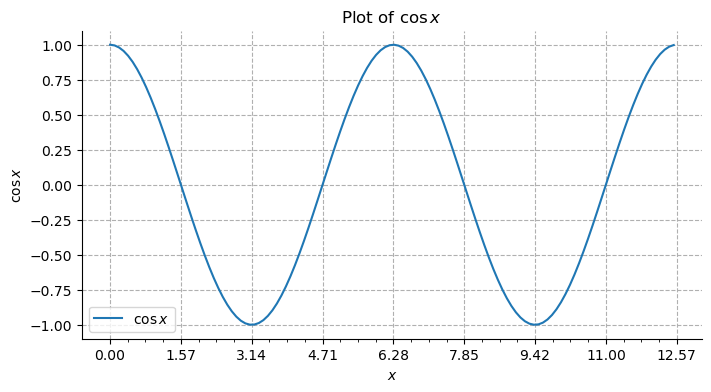

In [39]:
x4 = np.arange(0, 4*np.pi, 0.1)
y4 = np.cos(x4)

plt.figure(figsize=(8, 4))

plt.plot(x4, y4, label='$\cos x$')

plt.xlabel('$x$')
plt.ylabel('$\cos x$')

plt.title('Plot of $\cos x$')
plt.legend()

plt.xticks(np.arange(0, 4 * np.pi+0.1, np.pi/2))
plt.xticks(np.arange(0, 4 * np.pi+0.1, np.pi/8), minor=True)

plt.grid(linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

## Overlaying Multiple Plots

It's quite easy to overlay multiple plots in a single figure. Just use the `plt.plot()` function multiple times, and you'll get a plot with multiple lines. For example, the code below verifies the trigonometric identity
$$\sec^2 x - \tan^2 x = 1$$

```python
x_mult = np.linspace(-2.5*np.pi+0.1, 2.5*np.pi-0.1, 500)
y_mult_1 = np.tan(x_mult) ** 2
y_mult_2 = np.cos(x_mult) ** -2  # Since NumPy does not natively support the secant, we use cosine inverse instead
y_mult_3 = y_mult_2 - y_mult_1

plt.figure(figsize=(12, 5))
plt.plot(x_mult, y_mult_1, label=r'$\tan^2 x$')
plt.plot(x_mult, y_mult_2, label=r'$\sec^2 x$')
plt.plot(x_mult, y_mult_3, label=r'$\sec^2 x - \tan^2 x$', linestyle='--')

plt.title(r'Trigonometric Identity $\sec^2 x - \tan^2 x = 1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-0.5, 4)

plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/8), minor=True)
plt.grid(linestyle=':')

plt.show()
```

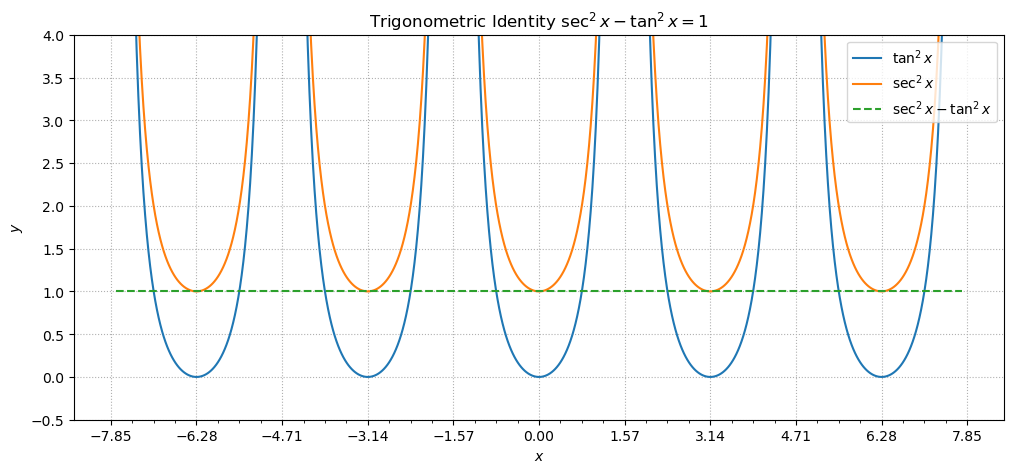

In [40]:
x_mult = np.linspace(-2.5*np.pi+0.1, 2.5*np.pi-0.1, 500)
y_mult_1 = np.tan(x_mult) ** 2
y_mult_2 = np.cos(x_mult) ** -2  # Since NumPy does not natively support the secant, we use cosine inverse instead
y_mult_3 = y_mult_2 - y_mult_1

plt.figure(figsize=(12, 5))
plt.plot(x_mult, y_mult_1, label=r'$\tan^2 x$')
plt.plot(x_mult, y_mult_2, label=r'$\sec^2 x$')
plt.plot(x_mult, y_mult_3, label=r'$\sec^2 x - \tan^2 x$', linestyle='--')

plt.title(r'Trigonometric Identity $\sec^2 x - \tan^2 x = 1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim(-0.5, 4)

plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/2))
plt.xticks(np.arange(-2.5*np.pi, 2.5*np.pi+0.1, np.pi/8), minor=True)
plt.grid(linestyle=':')

plt.show()

<span style="color:green">**Exercise**:</span> Now it's the time to take our Morse potential back! We want to compare the Morse potential with the harmonic potential. Plot these two potentials on the same figure. You should first define a function called `harmonic`, which takes values of $r$, $r_0$, and $k$ as input, and returns the value of the harmonic potential at that point. Recall that the harmonic potential is given by
$$V_\text{harmonic}(r) = \frac{1}{2} k \left( r - r_0 \right)^2$$

Define `harmonic(r, k, r0)` in the code cell below.

In [41]:
def harmonic(r, k, r0):
    return 0.5 * k * (r - r0) ** 2

Here $k$ is the spring constant, which is given by
$$k = 2D_e a^2$$

Define `k` in the code cell below, which has the unit $\mathrm{eV/Å^2}$.

In [42]:
k = 2 * De * a**2

Use the code below as your starting point. You can also refer to the code of Morse plot in the previous section. Feel free to add additional features to your plot to make it pretty(´▽｀)

```python
r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = ...  # Morse potential
V_harmonic = ...  # Harmonic potential
```

_Hint: How can this plot appropriately reflect the comparison between two potentials? The upper limit of your $y$-axis should be somehow slightly larger than $D_e$, and the lower limit should be..._

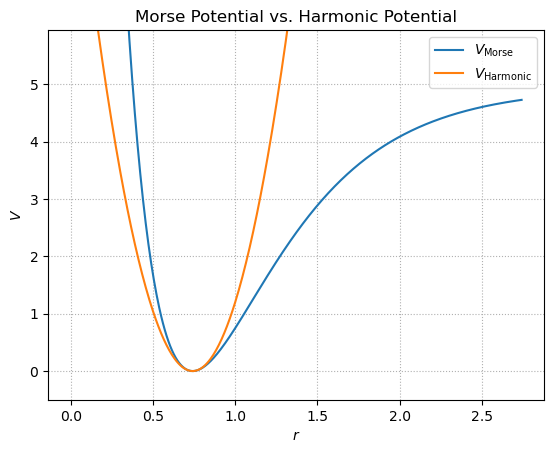

In [43]:
r = np.linspace(0, r0 + 2.0, 500)  # Å
V_morse = morse(r, De, a, r0)  # Morse potential
V_harmonic = harmonic(r, k, r0)  # Harmonic potential

plt.plot(r, V_morse, label=r'$V_\text{Morse}$')
plt.plot(r, V_harmonic, label=r'$V_\text{Harmonic}$')

plt.title(r'Morse Potential vs. Harmonic Potential')
plt.legend()

plt.xlabel('$r$')
plt.ylabel('$V$')
plt.ylim(-0.5, De+1)

plt.grid(linestyle=':')

plt.show()

<span style="color:green">**Exercise**:</span> We want to test [Beer–Lambert's law](https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law). _Don't tell me you don't know it!_

_...Well, probably you really don't..._

_Oh, god...okay, fine, I'll tell you..._

(\*Cough) The Beer–Lambert law describes the relationship between the concentration of a substance in a solution and the amount of light it absorbs. In simple terms, the more concentrated the solution is, the more light it absorbs as it passes through. This principle is widely used in chemistry and biology to determine the concentration of compounds using spectrophotometry, making it a fundamental tool for quantitative analysis.

Mathematically, this law states that absorbance is directly proportional to both the concentration of the absorbing species and the path length of the light through the solution, expressed as:
$$A = \varepsilon c l$$

Here,
- $A$ is the _absorbance_, which is dimensionless—since it is a ratio;
- $\varepsilon$ is the _molar absorptivity_ or _molar extinction coefficient_, in the unit $\mathrm{L \cdot mol^{-1} \cdot cm^{-1}}$, which indicates how strongly the substance absorbs light at a given wavelength;
- $c$ is the _concentration_ of the absorbing species, usually takes the unit $\mathrm{mol \cdot L^{-1}}$;
- $l$ is the _path length_ of the light through the solution, usually the width of the cuvette, in $\mathrm{cm}$.

For methylene blue, the molar absorptivity at $665\,\mathrm{nm}$ is $6.71 \times 10^{4}\,\mathrm{L \cdot mol^{-1} \cdot cm^{-1}}$ in water ([_React. Chem. Eng._ **2020**, 5, 377–386](https://doi.org/10.1039/C9RE00456D)). Define $\varepsilon$ in the code cell below as `eps`.

```python
eps = 6.71e4
```

In [44]:
eps = 6.71e4

Plot a standard curve of absorbance versus concentration from $0$ to $5 \times 10^{-5}\,\mathrm{M}$ using dashed line. Assume that $l = 1\,\mathrm{cm}$ in this whole exercise. You should have major $x$-ticks at $1 \times 10^{-5}, 2 \times 10^{-5}, 3 \times 10^{-5}, 4 \times 10^{-5}, 5 \times 10^{-5}\,\mathrm{M}$, also including minor ticks appropriately. For $y$-ticks, try to include minor ticks that appropriately represent the values from $0$ to $3.5$.

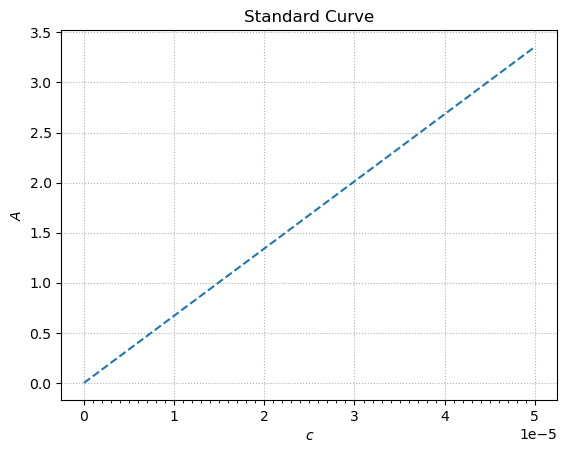

In [45]:
conc = np.linspace(0, 5.0e-5, 500)
absor = eps * conc

plt.figure()
plt.plot(conc, absor, linestyle='--')

plt.title(r'Standard Curve')

plt.xlabel('$c$')
plt.ylabel('$A$')

plt.grid(linestyle=':')
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

<span style="color:#39c5bb">Yue 20 **Van Nya** "<u>**5min**</u>"</span> ~~is on the way!~~ has acquired a set of data from a spectrometer. The data is stored in an array:

```python
data_conc = np.array([2.34, 4.69, 9.38, 18.76, 37.52]) * 1e-6
data_absor = np.array([114, 514, 810, 1919, 3810]) * 1e-3
```

Plot the data as a <u>scatter plot</u> along with the standard curve.

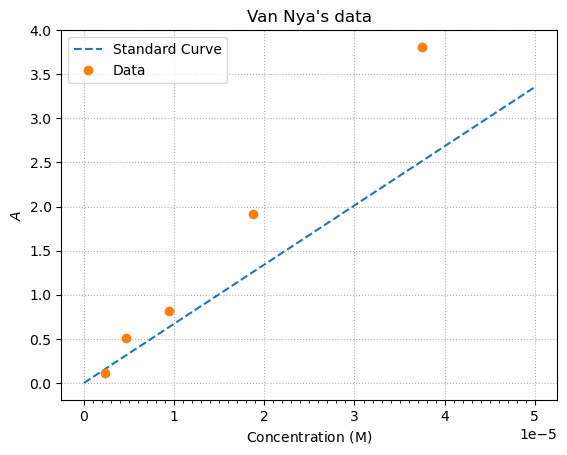

In [46]:
data_conc = np.array([2.34, 4.69, 9.38, 18.76, 37.52]) * 1e-6
data_absor = np.array([114, 514, 810, 1919, 3810]) * 1e-3

plt.plot(conc, absor, linestyle='--', label='Standard Curve')
plt.plot(data_conc, data_absor, marker='o', linestyle='', label='Data')

plt.title('Van Nya\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$A$')

plt.grid(linestyle=':')
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

Do you think Van Nya made a good measurement? ~~If not, don't hesitate to slap him with your hands! o(｀ω´ )o~~

You can check the accuracy of your measurement by plotting the residuals of the data against the standard curve, using the code below:

```python
plt.plot(data_conc, data_conc * eps - data_absor, linestyle='', marker='o', label='Residuals')
plt.hlines(0, -1e-5, 6e-5, colors='red', linestyles='--', label='Zero Error')  # This creates a horizontal line at y=0 from -1e-5 to 6e-5
# Similarly, you should expect a function `plt.vlines(x, ymin, ymax, ...)` to create a vertical line at x=x from ymin to ymax
# Although we don't need it here:)

plt.title('Residuals of Van Nya\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$\Delta A$')

plt.axis([0, 5e-5, -1.5, 1.5])

plt.grid(linestyle='--')

plt.xticks(...)  # You should know how to do this! Use the same ticks as before

plt.show()
```

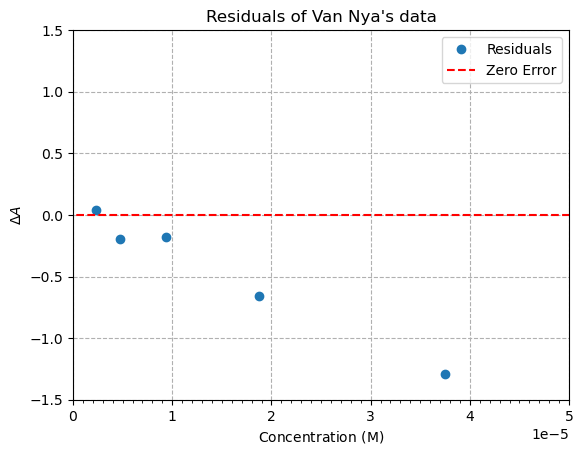

In [47]:
plt.plot(data_conc, data_conc * eps - data_absor, linestyle='', marker='o', label='Residuals')
plt.hlines(0, -1e-5, 6e-5, colors='red', linestyles='--', label='Zero Error')  # This creates a horizontal line at y=0 from -1e-5 to 6e-5
# Similarly, you should expect a function `plt.vlines(x, ymin, ymax, ...)` to create a vertical line at x=x from ymin to ymax
# Although we don't need it here:)

plt.title('Residuals of Van Nya\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$\Delta A$')

plt.axis([0, 5e-5, -1.5, 1.5])

plt.grid(linestyle='--')

plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

Do you see a clear pattern in the residuals? That means that the data has systematic errors. A good measurement should have residuals randomly distributed around zero.

Another student has measured the same data using the same set of sample solutions (so you can use `data_conc` as your $x$-axis data), and the results are stored in the array `data_absor_2`. Plot the data as a scatter plot along with the standard curve.

```python
data_absor_2 = np.array([0.15, 0.35, 0.65, 1.25, 2.30])
```

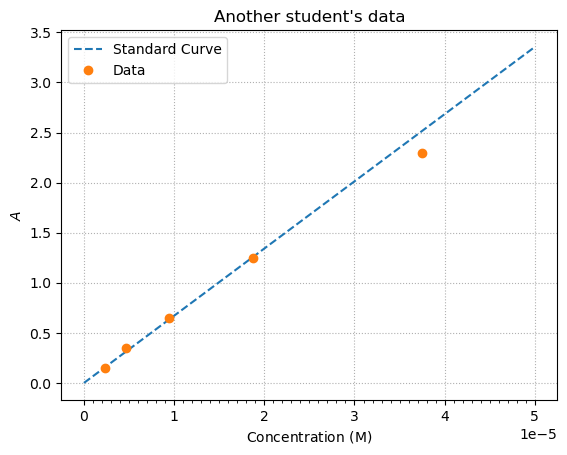

In [48]:
data_absor_2 = np.array([0.15, 0.35, 0.65, 1.25, 2.30])

plt.figure()
plt.plot(conc, absor, linestyle='--', label='Standard Curve')
plt.plot(data_conc, data_absor_2, linestyle='', marker='o', label='Data')

plt.title('Another student\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$A$')

plt.grid(linestyle=':')
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$A$')

plt.show()

Check the accuracy of the measurement by plotting the residuals.

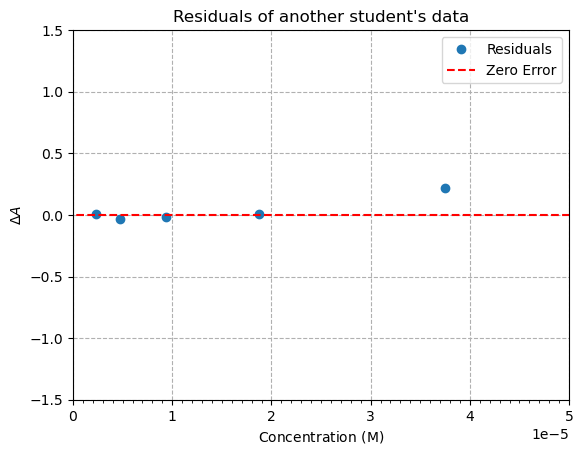

In [49]:
plt.plot(data_conc, data_conc * eps - data_absor_2, linestyle='', marker='o', label='Residuals')
plt.hlines(0, -1e-5, 6e-5, colors='red', linestyles='--', label='Zero Error')  # This creates a horizontal line at y=0 from -1e-5 to 6e-5
# Similarly, you should expect a function `plt.vlines(x, ymin, ymax, ...)` to create a vertical line at x=x from ymin to ymax
# Although we don't need it here:)

plt.title('Residuals of another student\'s data')
plt.legend()

plt.xlabel(r'Concentration ($\mathrm{M}$)')
plt.ylabel(r'$\Delta A$')

plt.axis([0, 5e-5, -1.5, 1.5])

plt.grid(linestyle='--')

plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-5))
plt.xticks(np.arange(0, 5.0e-5 + 1e-7, 1e-6), minor=True)

plt.show()

You may notice that at $3.752 \times 10^{-5}\,\mathrm{M}$, the absorbance deviates a little bit from the standard curve. This is because we actually reached the _limit of linearity_ (LoL) of Beer–Lambert's law, at around $A = 1$. Beyond this point, the absorbance is no longer linear but will gradually reach a plateau (<span style="color:green">why?</span>). Nonetheless, besides this point as an outlier, other points are still close to the standard curve, as we have also seen in the residual plot—a close, but random distribution.

## Multiple Subplots in a Single Figure

Sometimes we may want to plot multiple **subplots** in a single figure. For example, we may want to plot the relationship between concentration and time for zeroth, first, and second order reactions to make better comparisons. However, these plots use different $y$ scales, so we cannot put them in a single overlay. To make multiple subplots, we can use the `subplot` function.

First, we need to generate a figure using `plt.figure()`. Then, we can use `plt.subplot(rows, columns, plot_number)` to create subplots. The first argument `rows` specifies the number of rows in the figure, and the second argument `columns` specifies the number of columns. The third argument `plot_number` specifies the plot number in the figure, **<u>which starts from `1`**</u>. <u>This numbering always follows left-to-right, **then** top-to-down.</u> Let's make a simple demonstration:

```python
A0 = 1.0          # initial concentration (M)
k0 = 0.02         # zeroth-order rate constant (M·s^-1)
k1 = 0.10         # first-order rate constant (s^-1)
k2 = 0.20         # second-order rate constant (M^-1·s^-1)
t  = np.linspace(0, 40, 100)  # time (s)

A_zeroth = A0 - k0*t
A_first  = A0 * np.exp(-k1*t)
A_second = A0 / (1 + k2*A0*t)

plt.figure(figsize=(12, 4))

# Zeroth order
plt.subplot(1, 3, 1)
plt.plot(t, A_zeroth, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Zeroth Order: $[A] = [A]_0 - kt$')

# First order
plt.subplot(1, 3, 2)
plt.plot(t, np.log(A_first), label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$')
plt.title(r'First Order: $\ln [A] = \ln [A]_0 - kt$')

# Second order
plt.subplot(1, 3, 3)
plt.plot(t, 1/A_second, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ (M$^{-1}$)')
plt.title(r'Second Order: $1/[A] = 1/[A]_0 + kt$')

plt.tight_layout() # This function automatically adjusts the spacing between subplots. You should use it when making multiple subplots!
plt.show()
```

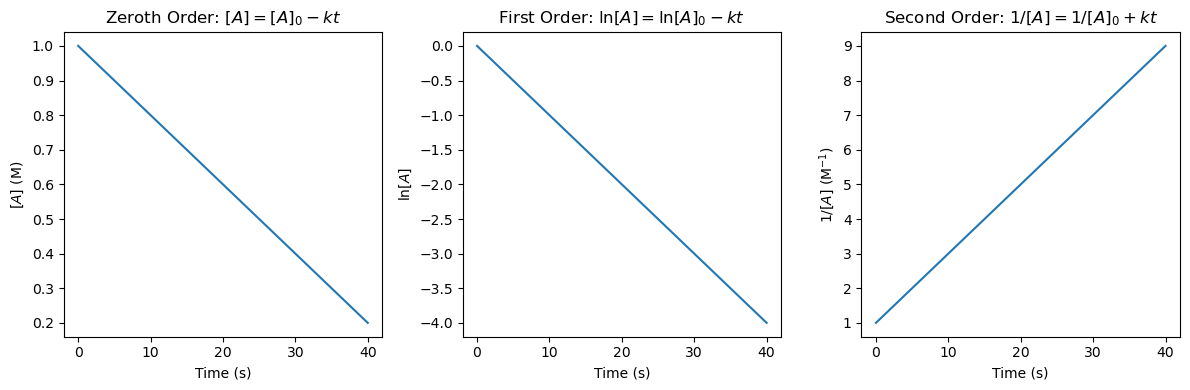

In [50]:
A0 = 1.0          # initial concentration (M)
k0 = 0.02         # zeroth-order rate constant (M·s^-1)
k1 = 0.10         # first-order rate constant (s^-1)
k2 = 0.20         # second-order rate constant (M^-1·s^-1)
t  = np.linspace(0, 40, 100)  # time (s)

A_zeroth = A0 - k0*t
A_first  = A0 * np.exp(-k1*t)
A_second = A0 / (1 + k2*A0*t)

plt.figure(figsize=(12, 4))

# Zeroth order
plt.subplot(1, 3, 1)
plt.plot(t, A_zeroth, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Zeroth Order: $[A] = [A]_0 - kt$')

# First order
plt.subplot(1, 3, 2)
plt.plot(t, np.log(A_first), label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$')
plt.title(r'First Order: $\ln [A] = \ln [A]_0 - kt$')

# Second order
plt.subplot(1, 3, 3)
plt.plot(t, 1/A_second, label='data')
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ (M$^{-1}$)')
plt.title(r'Second Order: $1/[A] = 1/[A]_0 + kt$')

plt.tight_layout() # This function automatically adjusts the spacing between subplots. You should use it when making multiple subplots!
plt.show()

What if you want to make a comparison between non-modified and modified first and second order reactions? We can make four subplots in a single figure:

```python
plt.figure(figsize=(8, 8))

# Non-modified first order
plt.subplot(2, 2, 1)
plt.plot(t, A_first)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified First Order Kinetics')

# Non-modified second order
plt.subplot(2, 2, 2)
plt.plot(t, A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified Second Order Kinetics')

# Modified first order
plt.subplot(2, 2, 3)
plt.plot(t, np.log(A_first))
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$ ($\ln \mathrm{M}$)')
plt.title('Modified First Order Kinetics')

# Modified second order
plt.subplot(2, 2, 4)
plt.plot(t, 1/A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ ($\mathrm{M}^{-1}$)')
plt.title('Modified Second Order Kinetics')

plt.tight_layout()
plt.show()
```

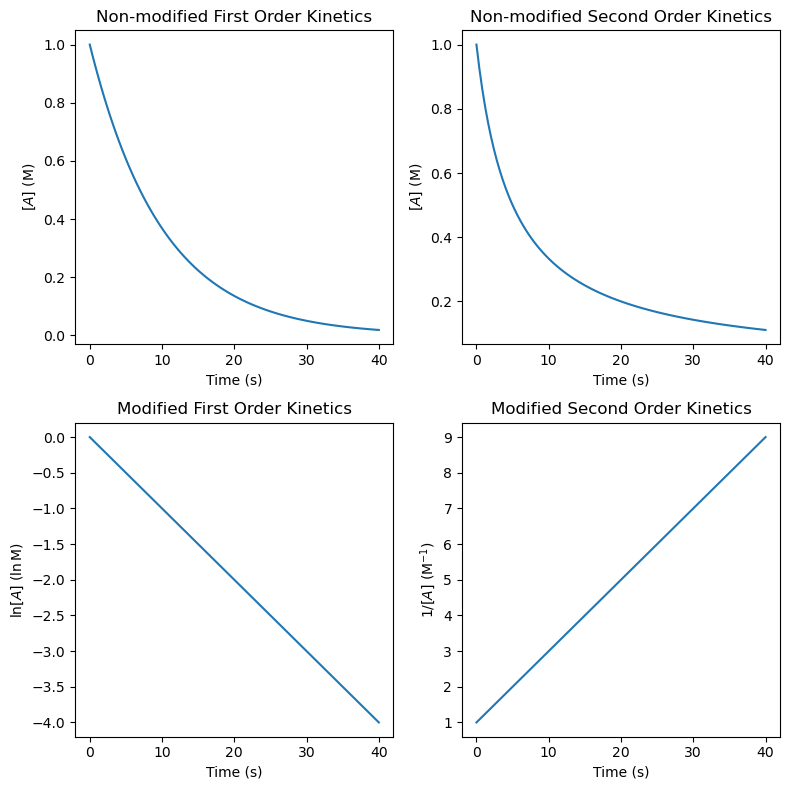

In [51]:
plt.figure(figsize=(8, 8))

# Non-modified first order
plt.subplot(2, 2, 1)
plt.plot(t, A_first)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified First Order Kinetics')

# Non-modified second order
plt.subplot(2, 2, 2)
plt.plot(t, A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$[A]$ (M)')
plt.title('Non-modified Second Order Kinetics')

# Modified first order
plt.subplot(2, 2, 3)
plt.plot(t, np.log(A_first))
plt.xlabel('Time (s)')
plt.ylabel(r'$\ln [A]$ ($\ln \mathrm{M}$)')
plt.title('Modified First Order Kinetics')

# Modified second order
plt.subplot(2, 2, 4)
plt.plot(t, 1/A_second)
plt.xlabel('Time (s)')
plt.ylabel(r'$1/[A]$ ($\mathrm{M}^{-1}$)')
plt.title('Modified Second Order Kinetics')

plt.tight_layout()
plt.show()

Here's another example of using multiple subplots in one figure. We will plot the IR spectrum of a 10% acetic acid solution in  organic solvents (data from the [NIST Chemistry WebBook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C64197&Units=SI&Type=IR-SPEC&Index=2)). The goal is to show the full spectrum across the top and two zoomed-in regions on the bottom. Note that the top plot spans both columns, while the two bottom plots each occupy one column.

```python
# Load data with numpy but skip the header row containing column names
data = np.loadtxt('./acetic acid.txt', skiprows=1)

# First column = Wavelength, next five columns = trials
wavenumber = data[:, 0]
trials = data[:, 1:6]
# The code above is used to load the data from the file - we will introduce this later

# Average across the five trials
avg = np.mean(trials, axis=1)

plt.figure(figsize=(12, 8))

# Top: full spectrum
plt.subplot(2, 2, (1, 2))
plt.plot(wavenumber, avg, color='black')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('Full IR Spectrum of Acetic Acid')
plt.gca().invert_xaxis()  # Conventional IR plotting (high to low wavenumber)
plt.grid(linestyle=':')

# Bottom left: O–H stretching region (3600–2200 cm⁻¹)
plt.subplot(2, 2, 3)
plt.plot(wavenumber, avg, color='blue')
plt.xlim(3600, 2200)  # Do not need to invert axis, since we have already set an inverted xlim
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('O–H Stretching Region (3600–2200 cm$^{-1}$)')
plt.grid(linestyle=':')

# Bottom right: C=O stretching region (1900–1500 cm⁻¹)
plt.subplot(2, 2, 4)
plt.plot(wavenumber, avg, color='red')
plt.xlim(1900, 1500)  # Do not need to invert axis, since we have already set an inverted xlim
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('C=O Stretching Region (1900–1500 cm$^{-1}$)')
plt.grid(linestyle=':')

plt.tight_layout()
plt.show()
```

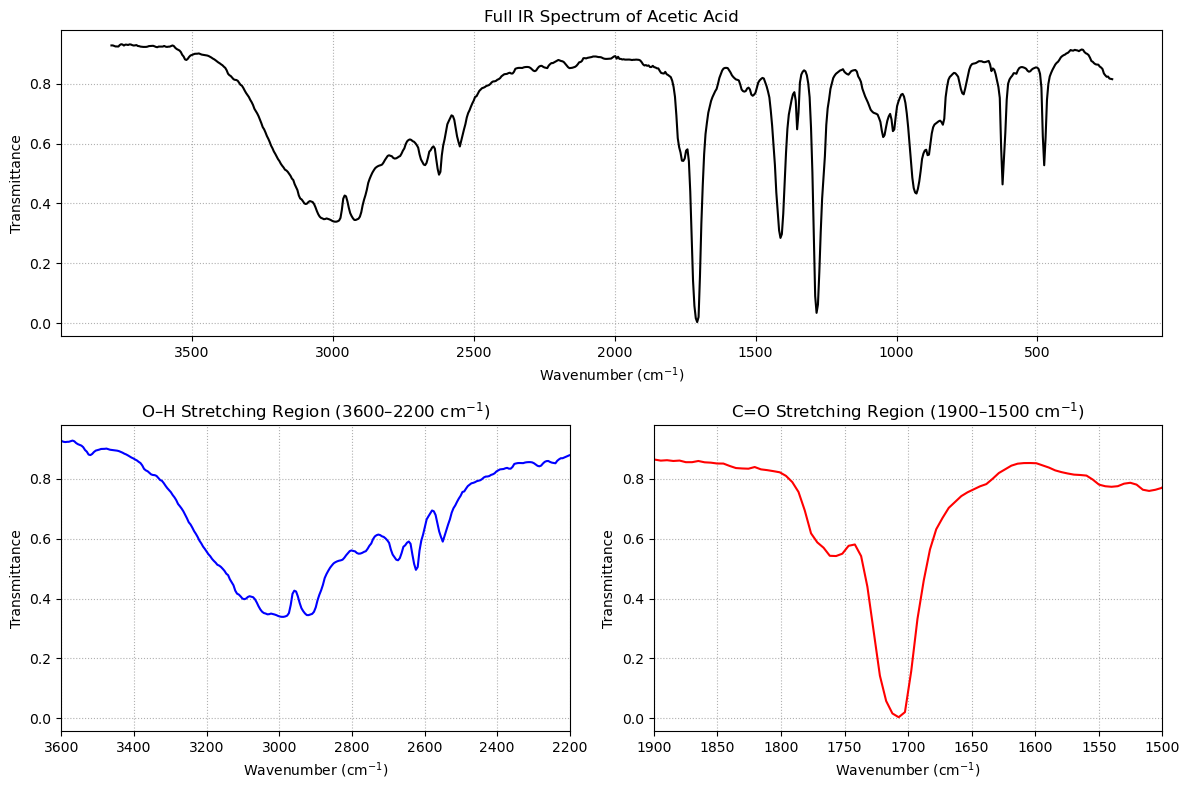

In [52]:
# Load data with numpy but skip the header row containing column names
data = np.loadtxt('./acetic acid.txt', skiprows=1)

# First column = Wavelength, next five columns = trials
wavenumber = data[:, 0]
trials = data[:, 1:6]
# The code above is used to load the data from the file - we will introduce this later

# Average across the five trials
avg = np.mean(trials, axis=1)

plt.figure(figsize=(12, 8))

# Top: full spectrum
plt.subplot(2, 2, (1, 2))
plt.plot(wavenumber, avg, color='black')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('Full IR Spectrum of Acetic Acid')
plt.gca().invert_xaxis()  # Conventional IR plotting (high to low wavenumber)
plt.grid(linestyle=':')

# Bottom left: O–H stretching region (3600–2200 cm⁻¹)
plt.subplot(2, 2, 3)
plt.plot(wavenumber, avg, color='blue')
plt.xlim(3600, 2200)  # Do not need to invert axis, since we have already set an inverted xlim
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('O–H Stretching Region (3600–2200 cm$^{-1}$)')
plt.grid(linestyle=':')

# Bottom right: C=O stretching region (1900–1500 cm⁻¹)
plt.subplot(2, 2, 4)
plt.plot(wavenumber, avg, color='red')
plt.xlim(1900, 1500)  # Do not need to invert axis, since we have already set an inverted xlim
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Transmittance')
plt.title('C=O Stretching Region (1900–1500 cm$^{-1}$)')
plt.grid(linestyle=':')

plt.tight_layout()
plt.show()

## Making Outputs

Finally! Finaaaaaaly!!! This is the last section of this lesson (though you still have an end-of-lesson problem~). The last thing after we made a plot is to save it. This can be done by using the `savefig` function. The first argument is the path of the file, and you can customize the file format, transparency, resolution, and more. Specifically:

```python
my_x = np.linspace(0, 10, 100)
my_y = my_x ** 2

fig = plt.figure(figsize=(5, 4))  # Here we assign the entire figure to a variable, which can be used later

plt.plot(my_x, my_y)
plt.title('A Naïve Quadratic Function')
plt.xlabel('$x$')
plt.ylabel('$y = x^2$')

plt.savefig('Naïve.png', transparent=True, format='png', dpi=300)
```

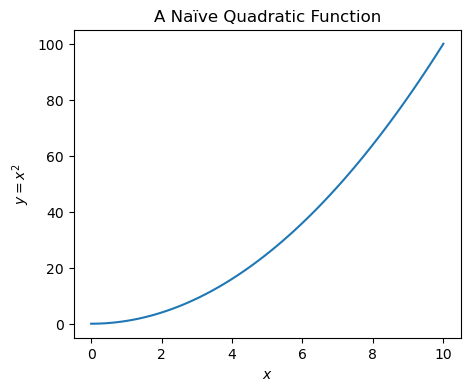

In [53]:
my_x = np.linspace(0, 10, 100)
my_y = my_x ** 2

fig = plt.figure(figsize=(5, 4))  # Here we assign the entire figure to a variable, which can be used later

plt.plot(my_x, my_y)
plt.title('A Naïve Quadratic Function')
plt.xlabel('$x$')
plt.ylabel('$y = x^2$')

plt.savefig('Naïve.png', transparent=True, format='png', dpi=300)

There are a lot of formats that you can use, including `.png`, `.jpg`, `.pdf`, `.svg`, and `.eps`. Try to output a PDF file:

```python
fig.savefig('Naïve2.pdf', transparent=True, format='pdf')
```

In [54]:
fig.savefig('Naïve2.pdf', transparent=True, format='pdf')

See? If we want to save a figure as multiple files, we can assign the entire figure to a variable (for example, `fig`), then use the `fig.savefig()` function multiple times.

## End-of-Lesson Problem

In this problem, you need to design a clean, publication-ready figure using concepts from this lesson. <u>**Be aware that the units used in this problem may not be consistent—you should adjust them accordingly!**</u>

You want to run a simulation of a chemical reaction and test its kinetic parameters, obtaining the activation energy.

First, let's generate our data. Create temperatures $T$ from $260–560\,\mathrm{K}$ (25 points, in a variable called `temp`). Choose $A = 2.0\times10^{12}\ \mathrm{s^{-1}}$ and $E_a = 48.0\ \mathrm{kJ\,mol^{-1}}$. With $R = 8.314\ \mathrm{J\,mol^{-1}\,K^{-1}}$, compute
$$k(T) = A\,\exp\!\left(-\frac{E_a}{RT}\right)$$
Add a random noise to the data of $k$ using the code：
```python
np.random.seed(114514)# fix random seed for reproducibility
noise = np.random.uniform(-0.25, 0.25, size=temp.shape)
```
The variable `noise` is a random array of the same shape as `temp`, containing noise values. You need to add the noise to the $k$-data to obtain the modified $k$-data.

Make a 1×2 figure. On the left, plot $k$ vs. $T$ with a logarithmic $y$-scale. <u>This should be a scatter plot.</u> Add axis labels, a concise title, and a dotted grid. Use major ticks every $50\,\mathrm{K}$ on $T$ and minor ticks in between. Place a legend in a corner that doesn't cover data. Hide the top and right spines, slightly thicken the left and bottom spines, and keep tick labels clear.

For the right subplot, plot $\ln k$ vs. $1000/T$, <u>also a scatter plot</u>. Here you are going to do linearization:
$$\ln k = - \frac{E_a}{RT} + \ln A$$
Set readable $x$-ticks spanning the full $1000/T$ range and label the axis. Add a dotted grid. Also do the same thing for the spines as in the left subplot.

Choose two clearly separated points $(x_1, y_1)$ and $(x_2, y_2)$ from your $\ln k$ vs. $1000/T$ plot, where $x = 1000/T$ and $y = \ln k$. Compute the slope $m = \frac{y_2 - y_1}{x_2 - x_1}$. Convert this to an activation energy using $E_a \approx -mR \times 1000$ (the factor 1000 accounts for using $1000/T$). Report $E_a$ in $\mathrm{kJ\,mol^{-1}}$. Print the two points you chosen and the estimated $E_a$ below your figure (just a simple text using `print()`). Plot a dashed line between these two chosen points to indicate the trend (this is _not_ a regression, but just a simple line).

On the semilog $k$ vs. $T$ panel (left), mark the lowest-temperature data point with a distinct marker.

Give the figure a balanced look: consistent fonts on labels, matching line widths, unobtrusive grid, etc. Call `plt.tight_layout()` and save a transparent 300 dpi PNG and a PDF. In one sentence, state when you would prefer PNG vs. PDF for this type of figure.

> <span style="color:#98caec">_There are a lot of tasks in this problem. You may need to add more code cells—don't panic! Try to break down into small parts and solve them one by one~_</span>

Prefer PNG for slides/quick previews and raster workflows; prefer PDF for vector-quality print/publication and infinite zoom without pixelation.


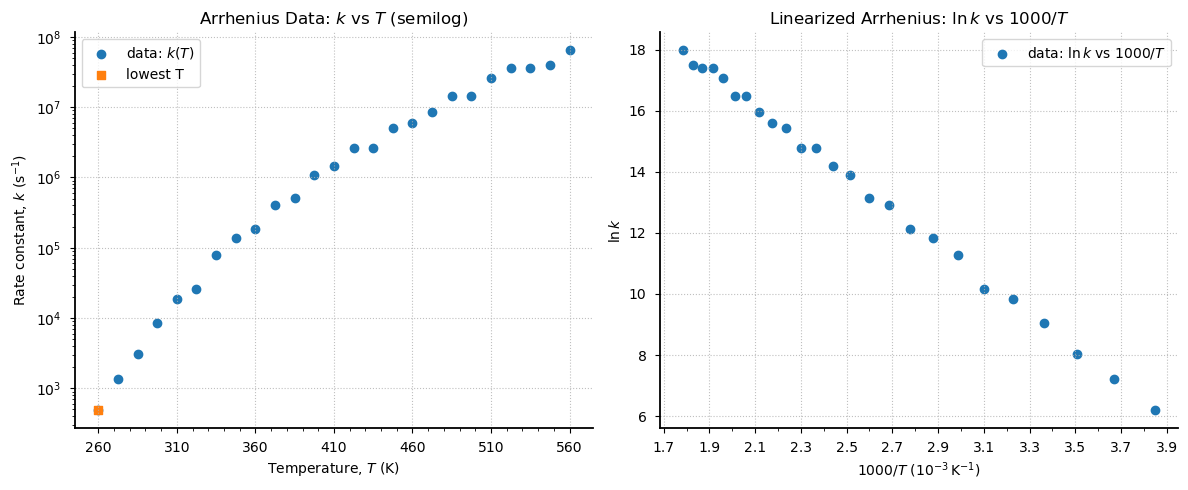

In [55]:
# ----------------------------
# 1) Generate reproducible kinetic data
# ----------------------------
# Temperatures (K): 25 points from 260 to 560
temp = np.linspace(260.0, 560.0, 25)

A = 2.0e12                           # s^-1
Ea_kJmol = 48.0                      # kJ/mol
Ea = Ea_kJmol * 1e3                  # convert to J/mol for R*T consistency
R = 8.314                            # J/(mol·K)

k_true = A * np.exp(-Ea / (R * temp))

# Add ±25% uniform noise (bounded) and ensure positivity
np.random.seed(114514)
noise = np.random.uniform(-0.25, 0.25, size=temp.shape)
k_noisy = k_true * (1.0 + noise)
#k_noisy = np.clip(k_noisy, 1e-300, None)  # avoid log(0) later

# Precompute values for the right panel
x_lin = 1000.0 / temp              # units: 10^-3 K^-1
y_lin = np.log(k_noisy)

# Choose two well-separated points for the "by-hand" slope
i1, i2 = 0, -1
x1, y1 = x_lin[i1], y_lin[i1]
x2, y2 = x_lin[i2], y_lin[i2]
m = (y2 - y1) / (x2 - x1)          # slope of ln(k) vs (1000/T)
Ea_est_Jmol = -m * R * 1000.0      # factor 1000 because x=1000/T
Ea_est_kJmol = Ea_est_Jmol / 1000.0

# ----------------------------
# 2) Build the 1×2 figure
# ----------------------------
plt.figure(figsize=(12, 5))

# ----- Left: k vs T (semilog y), scatter -----
plt.subplot(1, 2, 1)
plt.scatter(temp, k_noisy, label=r"data: $k(T)$")
plt.yscale("log")
plt.xlabel(r"Temperature, $T$ (K)")
plt.ylabel(r"Rate constant, $k$ (s$^{-1}$)")
plt.title(r"Arrhenius Data: $k$ vs $T$ (semilog)")
# grid & ticks
plt.grid(True, linestyle=":", alpha=0.8)
plt.xticks(np.arange(260, 561, 50.0))               # major every 50 K
plt.xticks(np.arange(260, 561, 10.0), minor=True)   # minor in between
# spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.3)
plt.gca().spines["bottom"].set_linewidth(1.3)
plt.tick_params(axis="both", which="major", pad=6)

#Highlight & annotate the lowest-temperature point
plt.scatter(temp[0], k_noisy[0], marker="s", label="lowest T")
# plt.annotate(
#     fr"$T={temp[0]:.0f}\,\mathrm{{K}}$\n$k={k_noisy[0]:.2e}\,\mathrm{{s^{{-1}}}}$",
#     xy=(temp[0], k_noisy[0]),
#     xytext=(temp[0] + 12, k_noisy[0]*1.7),
#     arrowprops=dict(arrowstyle="->", lw=1),
# )

plt.legend(loc="best")

# ----- Right: ln(k) vs 1000/T, scatter (linearization) -----
plt.subplot(1, 2, 2)
plt.scatter(x_lin, y_lin, label=r"data: $\ln k$ vs $1000/T$")
plt.xlabel(r"$1000/T$ ($10^{-3}\,\mathrm{K^{-1}}$)")
plt.ylabel(r"$\ln k$")
plt.title(r"Linearized Arrhenius: $\ln k$ vs $1000/T$")
# grid & ticks
plt.grid(True, linestyle=":", alpha=0.8)
# make readable ticks over the observed range
x_min, x_max = float(np.min(x_lin)), float(np.max(x_lin))
# round outward to 1 decimal for neat tick marks
left_tick = np.floor(10*x_min)/10.0
right_tick = np.ceil(10*x_max)/10.0
plt.xticks(np.arange(left_tick, right_tick + 0.1, 0.2))
plt.xticks(np.arange(left_tick, right_tick + 0.05, 0.1), minor=True)
# spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_linewidth(1.3)
plt.gca().spines["bottom"].set_linewidth(1.3)
plt.tick_params(axis="both", which="major", pad=6)

# # Annotate the two chosen points and the estimated Ea (no regression line)
# txt = (
#     fr"Points: $(x_1,y_1)=({x1:.2f},{y1:.2f}),$ "
#     fr"$(x_2,y_2)=({x2:.2f},{y2:.2f})$" "\n"
#     fr"$m=\frac{{\Delta y}}{{\Delta x}}={m:.3f}$"
#     "\n"
#     fr"$\hat{{E}}_a=-m R \times 1000={Ea_est_kJmol:.2f}\ \mathrm{{kJ\,mol^{{-1}}}}$"
# )
# # place the text box near the upper-left of the panel
# x_box = left_tick + 0.1
# y_box = np.max(y_lin) - 0.2*(np.max(y_lin)-np.min(y_lin))
# plt.text(x_box, y_box, txt, fontsize=9,
#          bbox=dict(facecolor="white", alpha=0.8, boxstyle="round,pad=0.3"))

plt.legend(loc="best")

# Layout & export
plt.tight_layout()

plt.savefig("arrhenius_semilog_and_linearized.pdf")
plt.savefig("arrhenius_semilog_and_linearized.png", dpi=300, transparent=True)

# One-sentence note:
print("Prefer PNG for slides/quick previews and raster workflows; prefer PDF for vector-quality print/publication and infinite zoom without pixelation.")

## Acknowledgement

This lesson draws on ideas from the following sources:

- [Matplotlib Official Website](https://matplotlib.org)
- Charles J. Weiss's [Scientific Computing for Chemists with Python](https://weisscharlesj.github.io/SciCompforChemists/notebooks/introduction/intro.html)
- [An Introduction to Python for Chemistry](https://pythoninchemistry.org/intro_python_chemists/intro.html)
- GenAI for making paragraphs and codes(・ω< )★
- And so many resources on Reddit, StackExchange, etc.!